In [1]:
import matplotlib.pyplot as plt
import os, sys
parent_dir = os.path.abspath('..')
if parent_dir not in sys.path:
    sys.path.append(parent_dir)
from bench_utils import *
from plot_utils import *

# ZNS append versus write performance

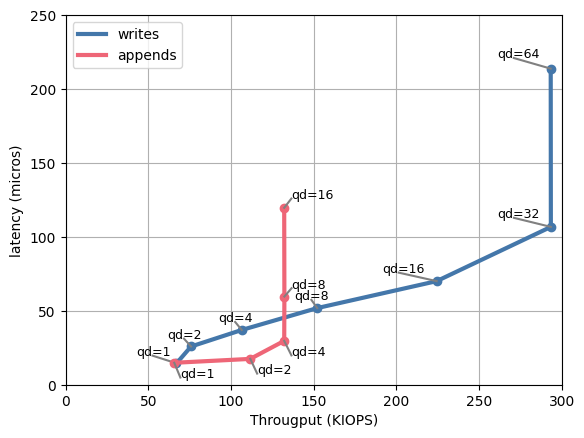

In [3]:
# Setup plot
fig, ax = plt.subplots()
plt.xlabel("Througput (KIOPS)")
plt.ylabel("latency (micros)")
#plt.title("Append versus write performance (request size=4KiB)")
ax.grid(True)

# Get data for writemq
qdss = [1,2,4,8,16,32,64]
kiops = []
lats = []
for qd in qdss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("io_uring"), "zns-a", 
            "lbaf2", "writemq", 1, qd, 4096
            )
        )
    kiops.append(dat.iops_mean / 1000)
    lats.append(dat.lat_mean / 1000)
    
# Writemq line plot
plt.plot(
    kiops,
    lats,
    linewidth=3,
    label="writes",
    color="#4477AA",
)

# Writemq QD labels
for i in range(len(kiops)):
            plt.plot(kiops[i], lats[i], "o", color="#4477AA")
            if qdss[i] == 1:
                plt.text((kiops[i] - 25) * (1.01), (lats[i] + 5) *
                         (1.01), s='qd='+str(qdss[i]), fontsize=9)
                plt.plot([(kiops[i] - 15) * (1.01), kiops[i]],[(lats[i]+5) *
                     (1.01),lats[i]], color='grey')
            elif qdss[i] > 8:
                plt.text((kiops[i] - 35) * (1.01), (lats[i] + 5) *
                         (1.01), s='qd='+str(qdss[i]), fontsize=9)                
                plt.plot([(kiops[i] - 25) * (1.01), kiops[i]],[(lats[i]+5) *
                     (1.01),lats[i]], color='grey')
            else:
                plt.text((kiops[i] - 15) * (1.01), (lats[i] + 5) *
                         (1.01), s='qd='+str(qdss[i]), fontsize=9)
                plt.plot([(kiops[i] - 5) * (1.01), kiops[i]],[(lats[i]+5) *
                     (1.01),lats[i]], color='grey')
   

 # Get data for Append
qdss = [1,2,4,8,16]
kiops = []
lats = []
for qd in qdss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("spdk"), "zns-a", 
            "lbaf2", "append", 1, qd, 4096
            )
        )
    kiops.append(dat.iops_mean / 1000)
    lats.append(dat.lat_mean / 1000)

# Append line plot
plt.plot(
    kiops,
    lats,
    linewidth=3,
    label="appends",
    color="#EE6677",
)

# Append QD labels
for i in range(len(kiops)):
            plt.plot(kiops[i], lats[i], "o", color="#EE6677")
            if qdss[i] >= 8:
                plt.text((kiops[i] + 3) * (1.01), (lats[i]+5) *
                     (1.01), s='qd='+str(qdss[i]), fontsize=9)                
                plt.plot([(kiops[i] + 3) * (1.01), kiops[i]],[(lats[i]+5) *
                     (1.01),lats[i]], color='grey')
            else:
                plt.text((kiops[i] + 3) * (1.01), (lats[i]-10) *
                     (1.01), s='qd='+str(qdss[i]), fontsize=9)
                plt.plot([(kiops[i] + 3) * (1.01), kiops[i]],[(lats[i]-10) *
                     (1.01),lats[i]], color='grey')

# Plot it
plt.xlim(0, 300)
plt.ylim(0, 250)
plt.legend()
fig.savefig("/mnt/data/projects/vu/paper-zns-measurements/supplements//write_versus_appends_4KiB.pdf")

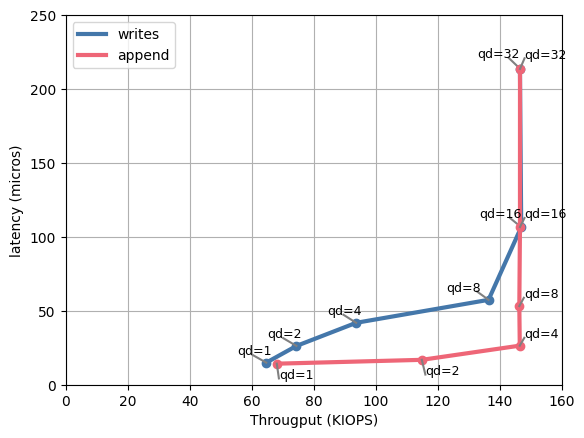

In [4]:
# Setup plot
fig, ax = plt.subplots()
plt.xlabel("Througput (KIOPS)")
plt.ylabel("latency (micros)")
#plt.title("Append versus write performance (request size=8KiB)")
ax.grid(True)

# Get data for writemq
qdss = [1,2,4,8,16,32]
kiops = []
lats = []
for qd in qdss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("io_uring"), "zns-a", 
            "lbaf0", "writemq", 1, qd, 4096<<1
            )
        )
    kiops.append(dat.iops_mean / 1000)
    lats.append(dat.lat_mean / 1000)
    
# Writemq line plot
plt.plot(
    kiops,
    lats,
    linewidth=3,
    label="writes",
    color="#4477AA",
)

# Writemq QD labels
for i in range(len(kiops)):
            plt.plot(kiops[i], lats[i], "o", color="#4477AA")
            if qdss[i] < 8:
                plt.text((kiops[i] - 10) * (1.01), (lats[i] + 5) *
                         (1.01), s='qd='+str(qdss[i]), fontsize=9)
                plt.plot([(kiops[i] - 5) * (1.01), kiops[i]],[(lats[i]+5) *
                     (1.01),lats[i]], color='grey')
            else:
                plt.text((kiops[i] - 15) * (1.01), (lats[i] + 5) *
                     (1.01), s='qd='+str(qdss[i]), fontsize=9)
                plt.plot([(kiops[i] - 5) * (1.01), kiops[i]],[(lats[i]+5) *
                     (1.01),lats[i]], color='grey')

# Get data for append
kiops = []
lats = []
for qd in qdss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("spdk"), "zns-a", 
            "lbaf0", "append", 1, qd, 4096<<1
            )
        )
    kiops.append(dat.iops_mean / 1000)
    lats.append(dat.lat_mean / 1000)

# Append line plot
plt.plot(
    kiops,
    lats,
    linewidth=3,
    label="append",
    color="#EE6677",
)

# Append QD labels
for i in range(len(kiops)):
            plt.plot(kiops[i], lats[i], "o", color="#EE6677")
            if qdss[i] < 4:
                plt.text(kiops[i] * (1.01), (lats[i] - 10) *
                     (1.01), s='qd='+str(qdss[i]), fontsize=9)                
                plt.plot([(kiops[i]) * (1.01), kiops[i]],[(lats[i]-10) *
                     (1.01),lats[i]], color='grey')
            else:
                plt.text(kiops[i] * (1.01), (lats[i] + 5) *
                     (1.01), s='qd='+str(qdss[i]), fontsize=9)
                plt.plot([(kiops[i]) * (1.01), kiops[i]],[(lats[i]+5) *
                     (1.01),lats[i]], color='grey')

# Plot it
plt.xlim(0, 160)
plt.ylim(0, 250)
plt.legend()
fig.savefig("/mnt/data/projects/vu/paper-zns-measurements/supplements/write_versus_appends_8KiB.pdf")

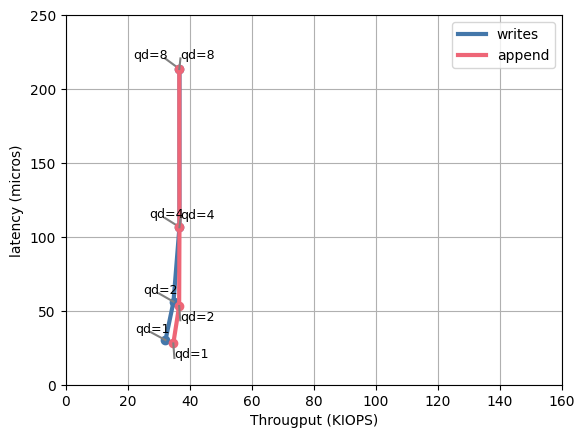

In [5]:
# Setup plot
fig, ax = plt.subplots()
plt.xlabel("Througput (KIOPS)")
plt.ylabel("latency (micros)")
#plt.title("Append versus write performance (request size=8KiB)")
ax.grid(True)

# Get data for writemq
qdss = [1,2,4,8]
kiops = []
lats = []
for qd in qdss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("io_uring"), "zns-a", 
            "lbaf2", "writemq", 1, qd, 4096<<3
            )
        )
    kiops.append(dat.iops_mean / 1000)
    lats.append(dat.lat_mean / 1000)
    
# Writemq line plot
plt.plot(
    kiops,
    lats,
    linewidth=3,
    label="writes",
    color="#4477AA",
)

# Writemq QD labels
for i in range(len(kiops)):
            plt.plot(kiops[i], lats[i], "o", color="#4477AA")
            if qdss[i] < 8:
                plt.text((kiops[i] - 10) * (1.01), (lats[i] + 5) *
                         (1.01), s='qd='+str(qdss[i]), fontsize=9)
                plt.plot([(kiops[i] - 5) * (1.01), kiops[i]],[(lats[i]+5) *
                     (1.01),lats[i]], color='grey')
            else:
                plt.text((kiops[i] - 15) * (1.01), (lats[i] + 5) *
                     (1.01), s='qd='+str(qdss[i]), fontsize=9)
                plt.plot([(kiops[i] - 5) * (1.01), kiops[i]],[(lats[i]+5) *
                     (1.01),lats[i]], color='grey')

# Get data for append
kiops = []
lats = []
for qd in qdss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("spdk"), "zns-a", 
            "lbaf2", "append", 1, qd, 4096<<3
            )
        )
    kiops.append(dat.iops_mean / 1000)
    lats.append(dat.lat_mean / 1000)

# Append line plot
plt.plot(
    kiops,
    lats,
    linewidth=3,
    label="append",
    color="#EE6677",
)

# Append QD labels
for i in range(len(kiops)):
            plt.plot(kiops[i], lats[i], "o", color="#EE6677")
            if qdss[i] < 4:
                plt.text(kiops[i] * (1.01), (lats[i] - 10) *
                     (1.01), s='qd='+str(qdss[i]), fontsize=9)                
                plt.plot([(kiops[i]) * (1.01), kiops[i]],[(lats[i]-10) *
                     (1.01),lats[i]], color='grey')
            else:
                plt.text(kiops[i] * (1.01), (lats[i] + 5) *
                     (1.01), s='qd='+str(qdss[i]), fontsize=9)
                plt.plot([(kiops[i]) * (1.01), kiops[i]],[(lats[i]+5) *
                     (1.01),lats[i]], color='grey')

# Plot it
plt.xlim(0, 160)
plt.ylim(0, 250)
plt.legend()
fig.savefig("/mnt/data/projects/vu/paper-zns-measurements/supplements/write_versus_appends_32KiB.pdf")

(0.0, 250.0)

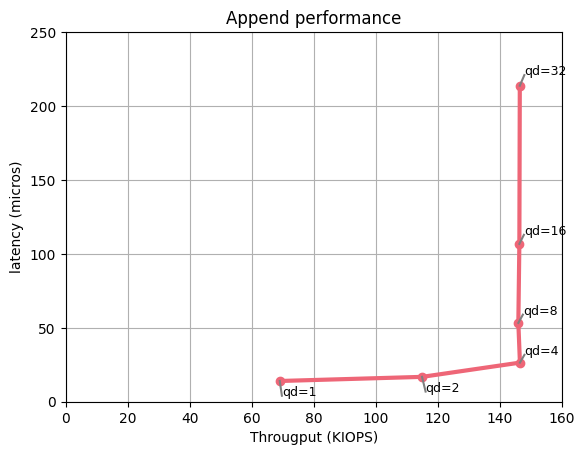

In [6]:
fig, ax = plt.subplots()
plt.xlabel("Througput (KIOPS)")
plt.ylabel("latency (micros)")
plt.title("Append performance")
ax.grid(True)

qdss = [1,2,4,8,16,32]

    
kiops = []
lats = []
for qd in qdss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("spdk"), "zns-a", 
            "lbaf2", "append", 1, qd, 4096<<1
            )
        )
    kiops.append(dat.iops_mean / 1000)
    lats.append(dat.lat_mean / 1000)

plt.plot(
    kiops,
    lats,
    linewidth=3,
    label="append",
    color="#EE6677",
)

for i in range(len(kiops)):
            plt.plot(kiops[i], lats[i], "o", color="#EE6677")
            if qdss[i] < 4:
                plt.text(kiops[i] * (1.01), (lats[i] - 10) *
                     (1.01), s='qd='+str(qdss[i]), fontsize=9)                
                plt.plot([(kiops[i]) * (1.01), kiops[i]],[(lats[i]-10) *
                     (1.01),lats[i]], color='grey')
            else:
                plt.text(kiops[i] * (1.01), (lats[i] + 5) *
                     (1.01), s='qd='+str(qdss[i]), fontsize=9)
                plt.plot([(kiops[i]) * (1.01), kiops[i]],[(lats[i]+5) *
                     (1.01),lats[i]], color='grey')

plt.xlim(0, 160)
plt.ylim(0, 250)
# plt.legend()

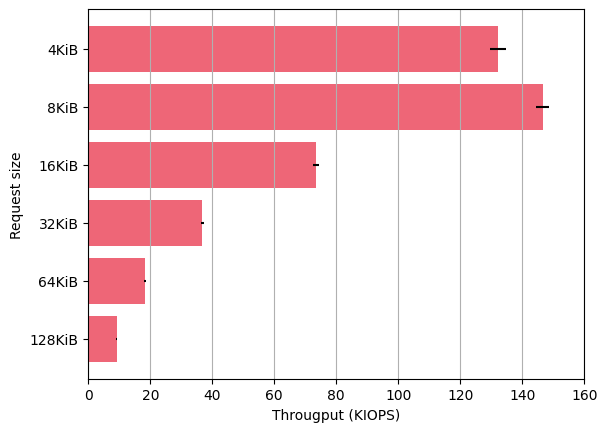

In [7]:
qd = 4
bss = [4096, 8192, 16384, 32768, 65536, 131072]

kiops = []
kiopse = []
for bs in bss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("spdk"), "zns-a", 
            "lbaf2", "append", 1, qd, bs
            )
        )
    kiops.append(dat.iops_mean / 1000)
    kiopse.append(dat.iops_stddev / 1000)

    
fig, ax = plt.subplots()
plt.xlabel("Througput (KIOPS)")
plt.ylabel("Request size")
#plt.title("Append througput (QD=4)")
ax.xaxis.grid() # horizontal lines
plt.xlim(0, 160)

ax.barh(range(len(bss)), kiops, xerr=kiopse, align='center', color="#EE6677")
ax.set_yticks(range(len(bss)), labels=["4KiB", "8KiB", "16KiB", "32KiB", "64KiB", "128KiB"])
ax.invert_yaxis()  # labels read top-to-bottom

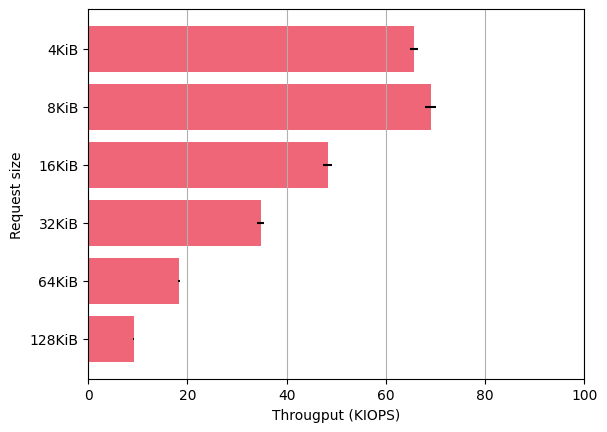

In [8]:
qd = 1
bss = [4096, 8192, 16384, 32768, 65536, 131072]

kiops = []
kiopse = []
for bs in bss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("spdk"), "zns-a", 
            "lbaf2", "append", 1, qd, bs
            )
        )
    kiops.append(dat.iops_mean / 1000)
    kiopse.append(dat.iops_stddev / 1000)

    
fig, ax = plt.subplots()
plt.xlabel("Througput (KIOPS)")
plt.ylabel("Request size")
# plt.title("Append througput (QD=1)")
ax.xaxis.grid() # horizontal lines
plt.xlim(0, 100)

ax.barh(range(len(bss)), kiops, xerr=kiopse, align='center', color="#EE6677")
ax.set_yticks(range(len(bss)), labels=["4KiB", "8KiB", "16KiB", "32KiB", "64KiB", "128KiB"])
ax.invert_yaxis()  # labels read top-to-bottom

fig.savefig("/mnt/data/projects/vu/paper-zns-measurements/supplements/append_ideal_request_size_throughput.pdf")

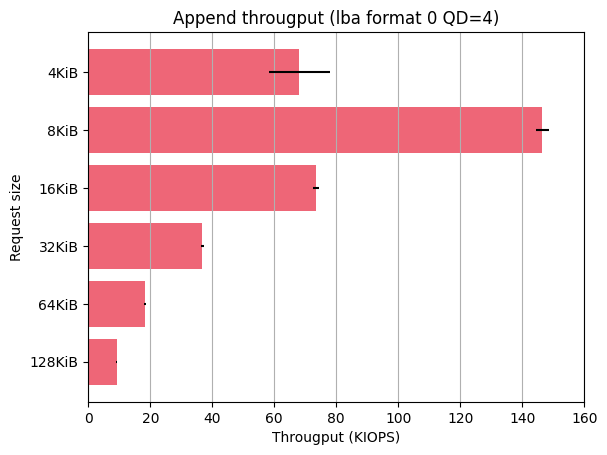

In [9]:
qd = 4
bss = [4096, 8192, 16384, 32768, 65536, 131072]

kiops = []
kiopse = []
for bs in bss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("spdk"), "zns-a", 
            "lbaf0", "append", 1, qd, bs
            )
        )
    kiops.append(dat.iops_mean / 1000)
    kiopse.append(dat.iops_stddev / 1000)

    
fig, ax = plt.subplots()
plt.xlabel("Througput (KIOPS)")
plt.ylabel("Request size")
plt.title("Append througput (lba format 0 QD=4)")
ax.xaxis.grid() # horizontal lines
plt.xlim(0, 160)

ax.barh(range(len(bss)), kiops, xerr=kiopse, align='center', color="#EE6677")
ax.set_yticks(range(len(bss)), labels=["4KiB", "8KiB", "16KiB", "32KiB", "64KiB", "128KiB"])
ax.invert_yaxis()  # labels read top-to-bottom

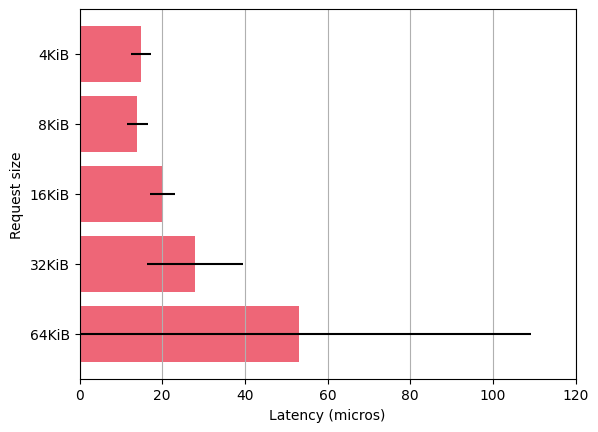

In [11]:
qd = 1
bss = [4096, 8192, 16384, 32768, 65536]

kiops = []
kiopse = []
for bs in bss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("spdk"), "zns-a", 
            "lbaf2", "append", 1, qd, bs
            )
        )
    kiops.append(dat.lat_mean / 1000)
    kiopse.append(dat.lat_stdef / 1000)

    
fig, ax = plt.subplots()
plt.xlabel("Latency (micros)")
plt.ylabel("Request size")
# plt.title("Append latency (QD=4)")
ax.xaxis.grid() # horizontal lines
plt.xlim(0, 120)

ax.barh(range(len(bss)), kiops, xerr=kiopse, align='center', color="#EE6677")
ax.set_yticks(range(len(bss)), labels=["4KiB", "8KiB", "16KiB", "32KiB", "64KiB"])
ax.invert_yaxis()  # labels read top-to-bottom
#fig.savefig("/mnt/krijnsdata/vu/paper-zns-measurements/supplements/append_ideal_request_size_latency.pdf")

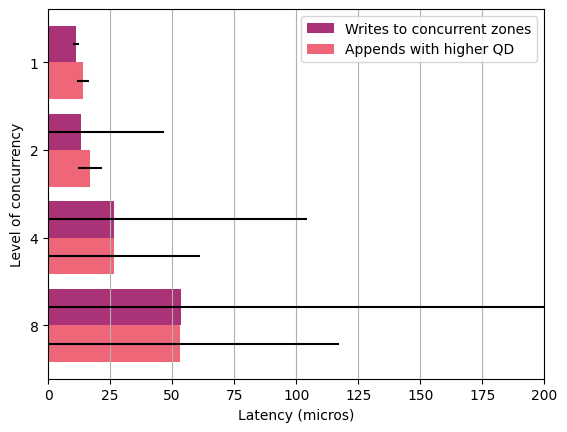

In [12]:
qd = 4
conc = [1,2,4,8]
# https://personal.sron.nl/~pault/

fig, ax = plt.subplots()
plt.xlabel("Latency (micros)")
plt.ylabel("Level of concurrency")
#plt.title("Append latency")
ax.xaxis.grid() # horizontal lines
plt.xlim(0, 200)

kiops = []
kiopse = []
for c in conc:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("spdk"), "zns-a", 
            "lbaf2", "write", c, 1, 4096<<1
            )
        )
    kiops.append(dat.lat_mean / 1000)
    kiopse.append(dat.lat_stdef / 1000)

ax.barh([(x*0.6) - 0.125 for x in range(len(conc))], kiops, xerr=kiopse, align='center', color="#AA3377", height=0.25,
       label='Writes to concurrent zones')

kiops = []
kiopse = []
for c in conc:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("spdk"), "zns-a", 
            "lbaf2", "append", 1, c, 4096<<1
            )
        )
    kiops.append(dat.lat_mean / 1000)
    kiopse.append(dat.lat_stdef / 1000)
    
    
ax.barh([(x*0.6) + 0.125 for x in range(len(conc))], kiops, xerr=kiopse, align='center', color="#EE6677", height=0.25,
       label='Appends with higher QD')
    
ax.set_yticks([x * 0.6 for x in range(len(conc))], labels=["1", "2", "4", "8"])
ax.invert_yaxis()  # labels read top-to-bottom

plt.legend()
fig.savefig("/mnt/data/projects/vu/paper-zns-measurements/supplements/concurrent_writes_latency.pdf")

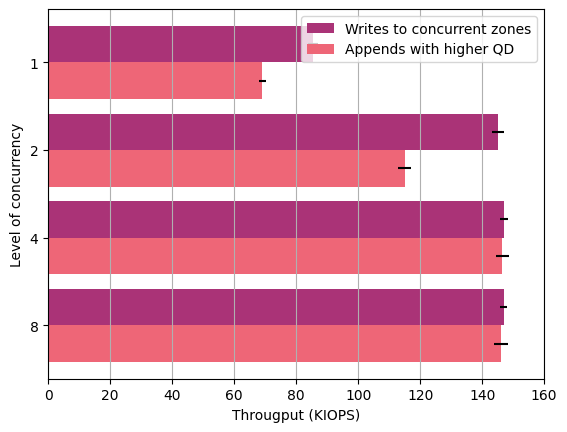

In [13]:
qd = 4
conc = [1,2,4,8]
# https://personal.sron.nl/~pault/

fig, ax = plt.subplots()
plt.xlabel("Througput (KIOPS)")
plt.ylabel("Level of concurrency")
#plt.title("Append througput")
ax.xaxis.grid() # horizontal lines
plt.xlim(0, 160)

kiops = []
kiopse = []
for c in conc:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("spdk"), "zns-a", 
            "lbaf2", "write", c, 1, 4096<<1
            )
        )
    kiops.append(dat.iops_mean / 1000)
    kiopse.append(dat.iops_stddev / 1000)

ax.barh([(x*0.6) - 0.125 for x in range(len(conc))], kiops, xerr=kiopse, align='center', color="#AA3377", 
        height=0.25, label='Writes to concurrent zones')

kiops = []
kiopse = []
for c in conc:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("spdk"), "zns-a", 
            "lbaf2", "append", 1, c, 4096<<1
            )
        )
    kiops.append(dat.iops_mean / 1000)
    kiopse.append(dat.iops_stddev / 1000)
    
    
ax.barh([(x*0.6) + 0.125 for x in range(len(conc))], kiops, xerr=kiopse, align='center', color="#EE6677", 
        height=0.25, label='Appends with higher QD')
    
ax.set_yticks([x*0.6 for x in range(len(conc))], labels=["1", "2", "4", "8"])
ax.invert_yaxis()  # labels read top-to-bottom

plt.legend()
fig.savefig("/mnt/data/projects/vu/paper-zns-measurements/supplements/concurrent_writes_throughput.pdf")

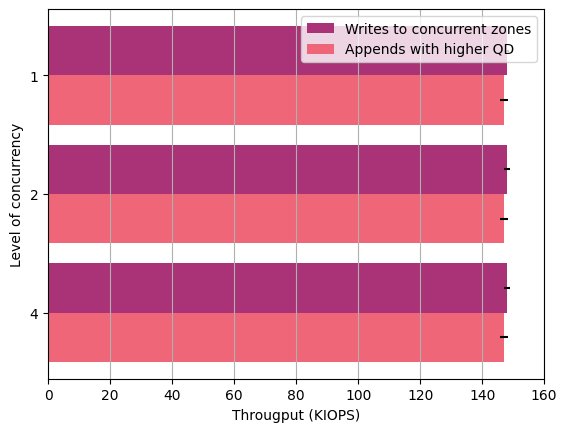

In [15]:
qd = 4
conc = [1,2,4]
# https://personal.sron.nl/~pault/

fig, ax = plt.subplots()
plt.xlabel("Througput (KIOPS)")
plt.ylabel("Level of concurrency")
#plt.title("Append througput")
ax.xaxis.grid() # horizontal lines
plt.xlim(0, 160)

kiops = []
kiopse = []
for c in conc:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("io_uring"), "zns-a", 
            "lbaf2", "writemq", 4, c, 4096<<1
            )
        )
    kiops.append(dat.iops_mean / 1000)
    kiopse.append(dat.iops_stddev / 1000)

ax.barh([(x*0.6) - 0.125 for x in range(len(conc))], kiops, xerr=kiopse, align='center', color="#AA3377", 
        height=0.25, label='Writes to concurrent zones')

kiops = []
kiopse = []
for c in conc:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("spdk"), "zns-a", 
            "lbaf2", "append", 4, c, 4096<<1
            )
        )
    kiops.append(dat.iops_mean / 1000)
    kiopse.append(dat.iops_stddev / 1000)
    
    
ax.barh([(x*0.6) + 0.125 for x in range(len(conc))], kiops, xerr=kiopse, align='center', color="#EE6677", 
        height=0.25, label='Appends with higher QD')
    
ax.set_yticks([x*0.6 for x in range(len(conc))], labels=["1", "2", "4"])
ax.invert_yaxis()  # labels read top-to-bottom

plt.legend()
fig.savefig("/mnt/data/projects/vu/paper-zns-measurements/supplements/concurrent_writes2_throughput.pdf")

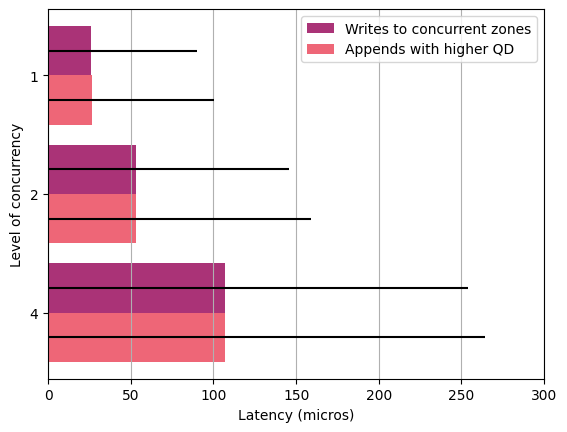

In [16]:
qd = 4
conc = [1,2,4]
# https://personal.sron.nl/~pault/

fig, ax = plt.subplots()
plt.xlabel("Latency (micros)")
plt.ylabel("Level of concurrency")
#plt.title("Append latency")
ax.xaxis.grid() # horizontal lines
plt.xlim(0, 300)

kiops = []
kiopse = []
for c in conc:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("io_uring"), "zns-a", 
            "lbaf2", "writemq", 4, c, 4096<<1
            )
        )
    kiops.append(dat.lat_mean / 1000)
    kiopse.append(dat.lat_stdef / 1000)

ax.barh([(x*0.6) - 0.125 for x in range(len(conc))], kiops, xerr=kiopse, align='center', color="#AA3377", height=0.25,
       label='Writes to concurrent zones')

kiops = []
kiopse = []
for c in conc:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("spdk"), "zns-a", 
            "lbaf2", "append", 4, c, 4096<<1
            )
        )
    kiops.append(dat.lat_mean / 1000)
    kiopse.append(dat.lat_stdef / 1000)
    
    
ax.barh([(x*0.6) + 0.125 for x in range(len(conc))], kiops, xerr=kiopse, align='center', color="#EE6677", height=0.25,
       label='Appends with higher QD')
    
ax.set_yticks([x * 0.6 for x in range(len(conc))], labels=["1", "2", "4"])
ax.invert_yaxis()  # labels read top-to-bottom

plt.legend()
fig.savefig("/mnt/data/projects/vu/paper-zns-measurements/supplements/concurrent_writes2_latency.pdf")

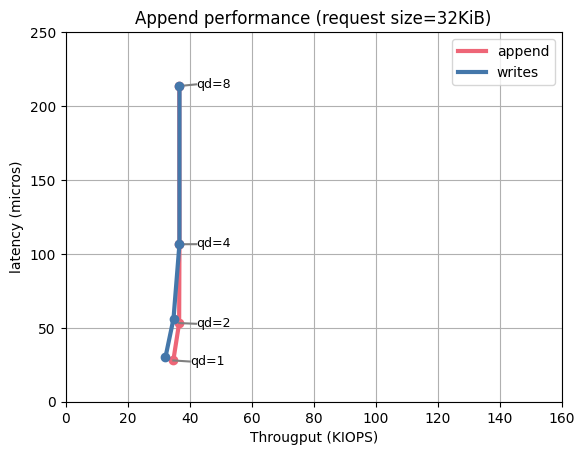

In [18]:
fig, ax = plt.subplots()
plt.xlabel("Througput (KIOPS)")
plt.ylabel("latency (micros)")
plt.title("Append performance (request size=32KiB)")
ax.grid(True)

qdss = [1,2,4,8]
bss = [512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072]
    
kiops = []
lats = []
for qd in qdss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("spdk"), "zns-a", 
            "lbaf2", "append", 1, qd, 32768
            )
        )
    kiops.append(dat.iops_mean / 1000)
    lats.append(dat.lat_mean / 1000)

plt.plot(
    kiops,
    lats,
    linewidth=3,
    label="append",
    color="#EE6677",
)

for i in range(len(kiops)):
            plt.plot(kiops[i], lats[i], "o", color="#EE6677")
            if qdss[i] < 4:
                plt.text((kiops[i]+5) * (1.01), (lats[i]-3) *
                     (1.01), s='qd='+str(qdss[i]), fontsize=9)                
                plt.plot([(kiops[i]+5) * (1.01), kiops[i]],[(lats[i]-1) *
                     (1.01),lats[i]], color='grey')
            else:
                plt.text((kiops[i] +5) * (1.01), (lats[i]-3) *
                     (1.01), s='qd='+str(qdss[i]), fontsize=9)
                plt.plot([(kiops[i]+5) * (1.01), kiops[i]],[(lats[i]-1) *
                     (1.01),lats[i]], color='grey')

kiops = []
lats = []
for qd in qdss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("io_uring"), "zns-a", 
            "lbaf2", "writemq", 1, qd, 32768
            )
        )
    kiops.append(dat.iops_mean / 1000)
    lats.append(dat.lat_mean / 1000)
    
plt.plot(
    kiops,
    lats,
    linewidth=3,
    label="writes",
    color="#4477AA",
)

for i in range(len(kiops)):
            plt.plot(kiops[i], lats[i], "o", color="#4477AA")
                
                
plt.xlim(0, 160)
plt.ylim(0, 250)

plt.legend()

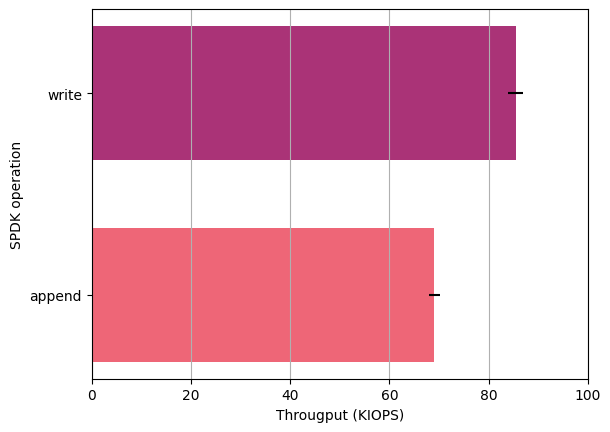

In [19]:
qd = 1
bss = [4096, 8192, 16384, 32768, 65536, 131072]

kiops = []
kiopse = []
for operation in ["write", "append"]:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("spdk"), "zns-a", 
            "lbaf2", operation, 1, 1, 4096<<1
            )
        )
    kiops.append(dat.iops_mean / 1000)
    kiopse.append(dat.iops_stddev / 1000)

    
fig, ax = plt.subplots()
plt.xlabel("Througput (KIOPS)")
plt.ylabel("SPDK operation")
#plt.title("Operation throughput (QD=1, request size=8KiB)")
ax.xaxis.grid() # horizontal lines
plt.xlim(0, 100)

ax.barh([0.125,0.5], kiops, xerr=kiopse, align='center', color=["#AA3377", "#EE6677"], height=0.25)
ax.set_yticks([0.125,0.5], labels=["write", "append"])
ax.invert_yaxis()  # labels read top-to-bottom
fig.savefig("/mnt/data/projects/vu/paper-zns-measurements/supplements/append_vs_write_qd1_throughput.pdf")

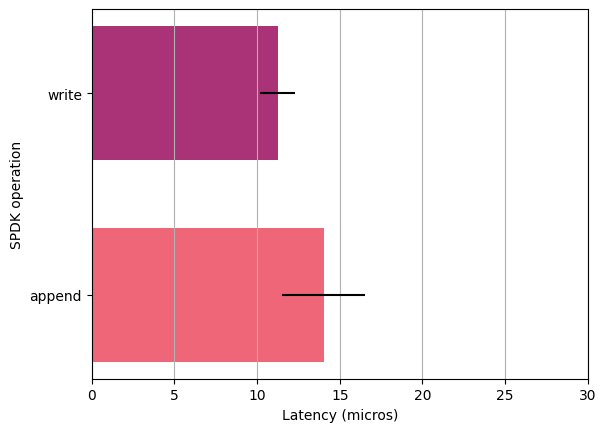

In [20]:
qd = 1
bss = [4096, 8192, 16384, 32768, 65536, 131072]

kiops = []
kiopse = []
for operation in ["write", "append"]:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("spdk"), "zns-a", 
            "lbaf2", operation, 1, 1, 4096<<1
            )
        )
    kiops.append(dat.lat_mean / 1000)
    kiopse.append(dat.lat_stdef / 1000)

    
fig, ax = plt.subplots()
plt.xlabel("Latency (micros)")
plt.ylabel("SPDK operation")
#plt.title("Operation throughput (QD=1, request size=8KiB)")
ax.xaxis.grid() # horizontal lines
plt.xlim(0, 30)

ax.barh([0.125,0.5], kiops, xerr=kiopse, align='center', color=["#AA3377", "#EE6677"], height=0.25)
ax.set_yticks([0.125,0.5], labels=["write", "append"])
ax.invert_yaxis()  # labels read top-to-bottom
fig.savefig("/mnt/data/projects/vu/paper-zns-measurements/supplements/append_vs_write_qd1_latency.pdf")

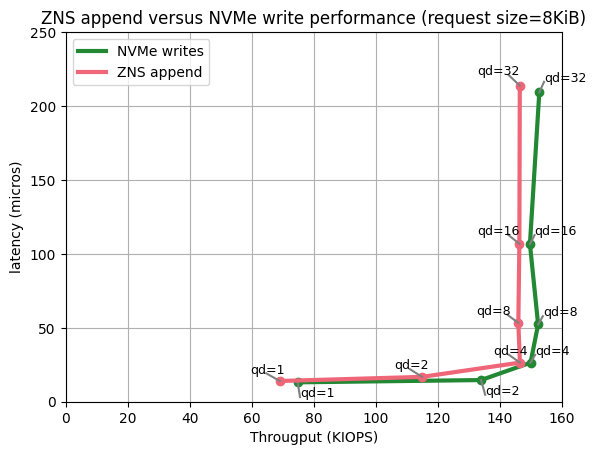

In [23]:
fig, ax = plt.subplots()
plt.xlabel("Througput (KIOPS)")
plt.ylabel("latency (micros)")
plt.title("ZNS append versus NVMe write performance (request size=8KiB)")
ax.grid(True)

qdss = [1,2,4,8,16,32]

kiops = []
lats = []
for qd in qdss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("spdk"), "nvme-a", 
            "lbaf3", "write", 1, qd, 4096<<1
            )
        )
    kiops.append(dat.iops_mean / 1000)
    lats.append(dat.lat_mean / 1000)
    
plt.plot(
    kiops,
    lats,
    linewidth=3,
    label="NVMe writes",
    color="#228833",
)

for i in range(len(kiops)):
            plt.plot(kiops[i], lats[i], "o", color="#228833")
            if qdss[i] < 4:
                plt.text(kiops[i] * (1.01), (lats[i] - 10) *
                     (1.01), s='qd='+str(qdss[i]), fontsize=9)                
                plt.plot([(kiops[i]) * (1.01), kiops[i]],[(lats[i]-10) *
                     (1.01),lats[i]], color='grey')
            else:
                plt.text(kiops[i] * (1.01), (lats[i] + 5) *
                     (1.01), s='qd='+str(qdss[i]), fontsize=9)
                plt.plot([(kiops[i]) * (1.01), kiops[i]],[(lats[i]+5) *
                     (1.01),lats[i]], color='grey')
    
kiops = []
lats = []
for qd in qdss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("spdk"), "zns-a", 
            "lbaf2", "append", 1, qd, 4096<<1
            )
        )
    kiops.append(dat.iops_mean / 1000)
    lats.append(dat.lat_mean / 1000)

plt.plot(
    kiops,
    lats,
    linewidth=3,
    label="ZNS append",
    color="#EE6677",
)

for i in range(len(kiops)):
            plt.plot(kiops[i], lats[i], "o", color="#EE6677")
            if qdss[i] < 8:
                plt.text((kiops[i] - 10) * (1.01), (lats[i] + 5) *
                         (1.01), s='qd='+str(qdss[i]), fontsize=9)
                plt.plot([(kiops[i] - 5) * (1.01), kiops[i]],[(lats[i]+5) *
                     (1.01),lats[i]], color='grey')
            else:
                plt.text((kiops[i] - 15) * (1.01), (lats[i] + 5) *
                     (1.01), s='qd='+str(qdss[i]), fontsize=9)
                plt.plot([(kiops[i] - 5) * (1.01), kiops[i]],[(lats[i]+5) *
                     (1.01),lats[i]], color='grey')

plt.xlim(0, 160)
plt.ylim(0, 250)
plt.legend()

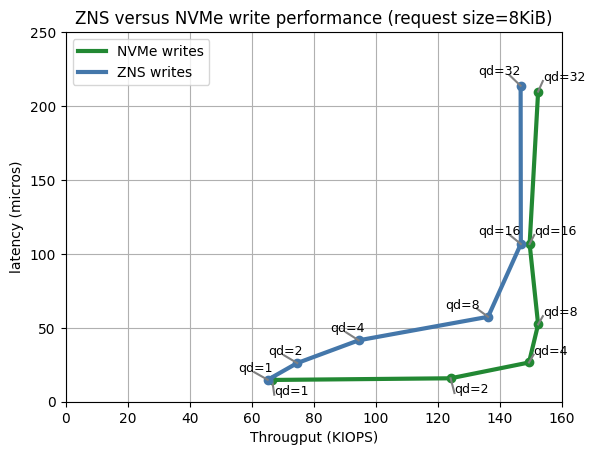

In [24]:
fig, ax = plt.subplots()
plt.xlabel("Througput (KIOPS)")
plt.ylabel("latency (micros)")
plt.title("ZNS versus NVMe write performance (request size=8KiB)")
ax.grid(True)

qdss = [1,2,4,8,16,32]

kiops = []
lats = []
for qd in qdss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("io_uring"), "nvme-a", 
            "lbaf3", "write", 1, qd, 4096<<1
            )
        )
    kiops.append(dat.iops_mean / 1000)
    lats.append(dat.lat_mean / 1000)
    
plt.plot(
    kiops,
    lats,
    linewidth=3,
    label="NVMe writes",
    color="#228833",
)

for i in range(len(kiops)):
            plt.plot(kiops[i], lats[i], "o", color="#228833")
            if qdss[i] < 4:
                plt.text(kiops[i] * (1.01), (lats[i] - 10) *
                     (1.01), s='qd='+str(qdss[i]), fontsize=9)                
                plt.plot([(kiops[i]) * (1.01), kiops[i]],[(lats[i]-10) *
                     (1.01),lats[i]], color='grey')
            else:
                plt.text(kiops[i] * (1.01), (lats[i] + 5) *
                     (1.01), s='qd='+str(qdss[i]), fontsize=9)
                plt.plot([(kiops[i]) * (1.01), kiops[i]],[(lats[i]+5) *
                     (1.01),lats[i]], color='grey')
    
kiops = []
lats = []
for qd in qdss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("io_uring"), "zns-a", 
            "lbaf2", "writemq", 1, qd, 4096<<1
            )
        )
    kiops.append(dat.iops_mean / 1000)
    lats.append(dat.lat_mean / 1000)

plt.plot(
    kiops,
    lats,
    linewidth=3,
    label="ZNS writes",
    color="#4477AA",
)

for i in range(len(kiops)):
            plt.plot(kiops[i], lats[i], "o", color="#4477AA")
            if qdss[i] < 8:
                plt.text((kiops[i] - 10) * (1.01), (lats[i] + 5) *
                         (1.01), s='qd='+str(qdss[i]), fontsize=9)
                plt.plot([(kiops[i] - 5) * (1.01), kiops[i]],[(lats[i]+5) *
                     (1.01),lats[i]], color='grey')
            else:
                plt.text((kiops[i] - 15) * (1.01), (lats[i] + 5) *
                     (1.01), s='qd='+str(qdss[i]), fontsize=9)
                plt.plot([(kiops[i] - 5) * (1.01), kiops[i]],[(lats[i]+5) *
                     (1.01),lats[i]], color='grey')

plt.xlim(0, 160)
plt.ylim(0, 250)
plt.legend()

# ZNS write performance

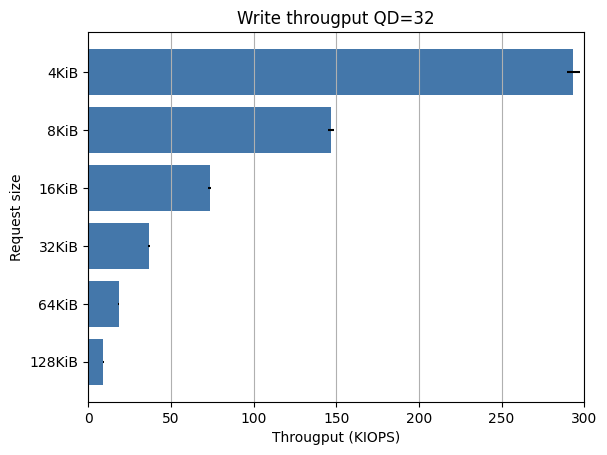

In [25]:
qd = 32
bss = [4096, 8192, 16384, 32768, 65536, 131072]

kiops = []
kiopse = []
for bs in bss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("io_uring"), "zns-a", 
            "lbaf2", "writemq", 1, qd, bs
            )
        )
    kiops.append(dat.iops_mean / 1000)
    kiopse.append(dat.iops_stddev / 1000)

    
fig, ax = plt.subplots()
plt.xlabel("Througput (KIOPS)")
plt.ylabel("Request size")
plt.title("Write througput QD=32")
ax.xaxis.grid() # horizontal lines
plt.xlim(0, 300)

ax.barh(range(len(bss)), kiops, xerr=kiopse, align='center', color="#4477AA")
ax.set_yticks(range(len(bss)), labels=["4KiB", "8KiB", "16KiB", "32KiB", "64KiB", "128KiB"])
ax.invert_yaxis()  # labels read top-to-bottom

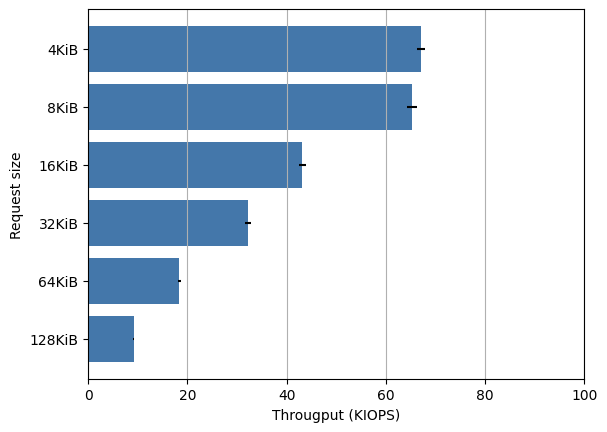

In [27]:
qd = 1
bss = [4096, 8192, 16384, 32768, 65536, 131072]

kiops = []
kiopse = []
for bs in bss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("io_uring"), "zns-a", 
            "lbaf2", "writemq", 1, qd, bs
            )
        )
    kiops.append(dat.iops_mean / 1000)
    kiopse.append(dat.iops_stddev / 1000)

    
fig, ax = plt.subplots()
plt.xlabel("Througput (KIOPS)")
plt.ylabel("Request size")
# plt.title("Write througput QD=1")
ax.xaxis.grid() # horizontal lines
plt.xlim(0, 100)

ax.barh(range(len(bss)), kiops, xerr=kiopse, align='center', color="#4477AA")
ax.set_yticks(range(len(bss)), labels=["4KiB", "8KiB", "16KiB", "32KiB", "64KiB", "128KiB"])
ax.invert_yaxis()  # labels read top-to-bottom

#fig.savefig("/mnt/krijnsdata/vu/paper-zns-measurements/supplements/write_ideal_request_size_throughput.pdf")

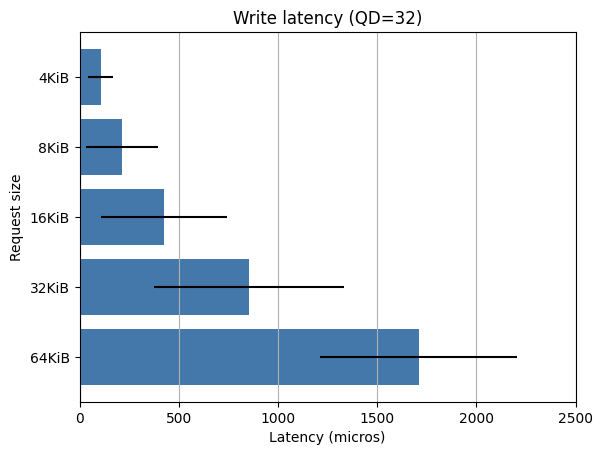

In [28]:
qd = 32
bss = [4096, 8192, 16384, 32768, 65536]

kiops = []
kiopse = []
for bs in bss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("io_uring"), "zns-a", 
            "lbaf2", "writemq", 1, qd, bs
            )
        )
    kiops.append(dat.lat_mean / 1000)
    kiopse.append(dat.lat_stdef / 1000)

    
fig, ax = plt.subplots()
plt.xlabel("Latency (micros)")
plt.ylabel("Request size")
plt.title("Write latency (QD=32)")
ax.xaxis.grid() # horizontal lines
plt.xlim(0, 2500)

ax.barh(range(len(bss)), kiops, xerr=kiopse, align='center', color="#4477AA")
ax.set_yticks(range(len(bss)), labels=["4KiB", "8KiB", "16KiB", "32KiB", "64KiB"])
ax.invert_yaxis()  # labels read top-to-bottom

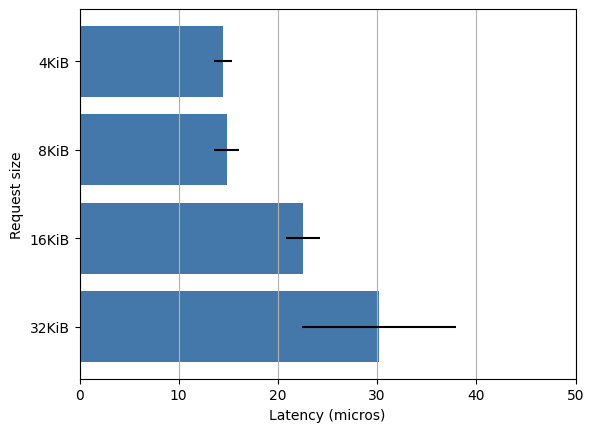

In [30]:
qd = 1
bss = [4096, 8192, 16384, 32768]

kiops = []
kiopse = []
for bs in bss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("io_uring"), "zns-a", 
            "lbaf2", "writemq", 1, qd, bs
            )
        )
    kiops.append(dat.lat_mean / 1000)
    kiopse.append(dat.lat_stdef / 1000)

    
fig, ax = plt.subplots()
plt.xlabel("Latency (micros)")
plt.ylabel("Request size")
#plt.title("Write latency (QD=1)")
ax.xaxis.grid() # horizontal lines
plt.xlim(0, 50)

ax.barh(range(len(bss)), kiops, xerr=kiopse, align='center', color="#4477AA")
ax.set_yticks(range(len(bss)), labels=["4KiB", "8KiB", "16KiB", "32KiB"])
ax.invert_yaxis()  # labels read top-to-bottom

#fig.savefig("/mnt/krijnsdata/vu/paper-zns-measurements/supplements/write_ideal_request_size_latency.pdf")

# ZNS randomly writeable area performance

In [ ]:
qd = 4
bss = [4096, 8192, 16384, 32768, 65536, 131072]

kiops = []
kiopse = []
for bs in bss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("io_uring"), "zns-a", 
            "lbaf3nvme", "write", 1, qd, bs
            )
        )
    kiops.append(dat.iops_mean / 1000)
    kiopse.append(dat.iops_stddev / 1000)

    
fig, ax = plt.subplots()
plt.xlabel("Througput (KIOPS)")
plt.ylabel("Request size")
plt.title("Write througput (QD=4)")
ax.xaxis.grid() # horizontal lines
plt.xlim(0, 300)

ax.barh(range(len(bss)), kiops, xerr=kiopse, align='center', color="#4477AA")
ax.set_yticks(range(len(bss)), labels=["4KiB", "8KiB", "16KiB", "32KiB", "64KiB", "128KiB"])
ax.invert_yaxis()  # labels read top-to-bottom

In [ ]:
qd = 4
bss = [4096, 8192, 16384, 32768, 65536]

kiops = []
kiopse = []
for bs in bss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("io_uring"), "zns-a", 
            "lbaf3nvme", "write", 1, qd, bs
            )
        )
    kiops.append(dat.lat_mean / 1000)
    kiopse.append(dat.lat_stdef / 1000)

    
fig, ax = plt.subplots()
plt.xlabel("Latency (micros)")
plt.ylabel("Request size")
plt.title("Write latency (QD=4)")
ax.xaxis.grid() # horizontal lines
plt.xlim(0, 500)

ax.barh(range(len(bss)), kiops, xerr=kiopse, align='center', color="#4477AA")
ax.set_yticks(range(len(bss)), labels=["4KiB", "8KiB", "16KiB", "32KiB", "64KiB"])
ax.invert_yaxis()  # labels read top-to-bottom

In [ ]:
fig, ax = plt.subplots()
plt.xlabel("Througput (KIOPS)")
plt.ylabel("latency (micros)")
plt.title("ZNS versus NVMe write performance (request size=8KiB)")
ax.grid(True)

qdss = [1,2,4,8,16,32]

kiops = []
lats = []
for qd in qdss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("io_uring"), "nvme-a", 
            "lbaf3", "write", 1, qd, 4096<<1
            )
        )
    kiops.append(dat.iops_mean / 1000)
    lats.append(dat.lat_mean / 1000)
    
plt.plot(
    kiops,
    lats,
    linewidth=3,
    label="NVMe writes",
    color="#228833",
)

for i in range(len(kiops)):
            plt.plot(kiops[i], lats[i], "o", color="#228833")
            if qdss[i] < 4:
                plt.text(kiops[i] * (1.01), (lats[i] - 10) *
                     (1.01), s='qd='+str(qdss[i]), fontsize=9)                
                plt.plot([(kiops[i]) * (1.01), kiops[i]],[(lats[i]-10) *
                     (1.01),lats[i]], color='grey')
            else:
                plt.text(kiops[i] * (1.01), (lats[i] + 5) *
                     (1.01), s='qd='+str(qdss[i]), fontsize=9)
                plt.plot([(kiops[i]) * (1.01), kiops[i]],[(lats[i]+5) *
                     (1.01),lats[i]], color='grey')
    
kiops = []
lats = []
for qd in qdss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("io_uring"), "zns-a", 
            "lbaf3nvme", "write", 1, qd, 4096<<1
            )
        )
    kiops.append(dat.iops_mean / 1000)
    lats.append(dat.lat_mean / 1000)

plt.plot(
    kiops,
    lats,
    linewidth=3,
    label="ZNS (NVMe namespace) writes",
    color="#4477AA",
)

for i in range(len(kiops)):
            plt.plot(kiops[i], lats[i], "o", color="#4477AA")
            if qdss[i] < 8:
                plt.text((kiops[i] - 10) * (1.01), (lats[i] + 5) *
                         (1.01), s='qd='+str(qdss[i]), fontsize=9)
                plt.plot([(kiops[i] - 5) * (1.01), kiops[i]],[(lats[i]+5) *
                     (1.01),lats[i]], color='grey')
            else:
                plt.text((kiops[i] - 15) * (1.01), (lats[i] + 5) *
                     (1.01), s='qd='+str(qdss[i]), fontsize=9)
                plt.plot([(kiops[i] - 5) * (1.01), kiops[i]],[(lats[i]+5) *
                     (1.01),lats[i]], color='grey')

plt.xlim(0, 160)
plt.ylim(0, 250)
plt.legend()

In [ ]:
fig, ax = plt.subplots()
plt.xlabel("Througput (KIOPS)")
plt.ylabel("latency (micros)")
plt.title("ZNS versus NVMe write performance (request size=8KiB)")
ax.grid(True)

qdss = [1,2,4,8,16,32]

kiops = []
lats = []
for qd in qdss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("spdk"), "nvme-a", 
            "lbaf3", "write", 1, qd, 4096<<1
            )
        )
    kiops.append(dat.iops_mean / 1000)
    lats.append(dat.lat_mean / 1000)
    
plt.plot(
    kiops,
    lats,
    linewidth=3,
    label="NVMe writes",
    color="#228833",
)

for i in range(len(kiops)):
            plt.plot(kiops[i], lats[i], "o", color="#228833")
            if qdss[i] < 4:
                plt.text(kiops[i] * (1.01), (lats[i] - 10) *
                     (1.01), s='qd='+str(qdss[i]), fontsize=9)                
                plt.plot([(kiops[i]) * (1.01), kiops[i]],[(lats[i]-10) *
                     (1.01),lats[i]], color='grey')
            else:
                plt.text(kiops[i] * (1.01), (lats[i] + 5) *
                     (1.01), s='qd='+str(qdss[i]), fontsize=9)
                plt.plot([(kiops[i]) * (1.01), kiops[i]],[(lats[i]+5) *
                     (1.01),lats[i]], color='grey')
    
kiops = []
lats = []
for qd in qdss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("spdk"), "zns-a", 
            "lbaf3nvme", "write", 1, qd, 4096<<1
            )
        )
    kiops.append(dat.iops_mean / 1000)
    lats.append(dat.lat_mean / 1000)

plt.plot(
    kiops,
    lats,
    linewidth=3,
    label="ZNS (NVMe namespace) writes",
    color="#4477AA",
)

for i in range(len(kiops)):
            plt.plot(kiops[i], lats[i], "o", color="#4477AA")
            if qdss[i] < 8:
                plt.text((kiops[i] - 10) * (1.01), (lats[i] + 5) *
                         (1.01), s='qd='+str(qdss[i]), fontsize=9)
                plt.plot([(kiops[i] - 5) * (1.01), kiops[i]],[(lats[i]+5) *
                     (1.01),lats[i]], color='grey')
            else:
                plt.text((kiops[i] - 15) * (1.01), (lats[i] + 5) *
                     (1.01), s='qd='+str(qdss[i]), fontsize=9)
                plt.plot([(kiops[i] - 5) * (1.01), kiops[i]],[(lats[i]+5) *
                     (1.01),lats[i]], color='grey')

plt.xlim(0, 160)
plt.ylim(0, 250)
plt.legend()

In [ ]:
# ... Marker 1 ...
fig, ax = plt.subplots()
plt.xlabel("Througput (KIOPS)")
plt.ylabel("latency (micros)")
plt.title("ZNS versus NVMe write performance (request size=4KiB)")
ax.grid(True)

qdss = [1,2,4,8,16,32,64]

kiops = []
lats = []
for qd in qdss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("io_uring"), "nvme-a", 
            "lbaf3", "write", 1, qd, 4096
            )
        )
    kiops.append(dat.iops_mean / 1000)
    lats.append(dat.lat_mean / 1000)
    
plt.plot(
    kiops,
    lats,
    linewidth=3,
    label="NVMe writes",
    color="#228833",
)

for i in range(len(kiops)):
            plt.plot(kiops[i], lats[i], "o", color="#228833")
            if qdss[i] < 4:
                plt.text(kiops[i] * (1.01), (lats[i] - 5) *
                     (1.01), s='qd='+str(qdss[i]), fontsize=9)                
                plt.plot([(kiops[i]) * (1.01), kiops[i]],[(lats[i]-5) *
                     (1.01),lats[i]], color='grey')
            elif qdss[i] >= 32:
                pass
            else:
                plt.text((kiops[i]-30) * (1.01), (lats[i] + 5) *
                     (1.01), s='qd='+str(qdss[i]), fontsize=9)
                plt.plot([(kiops[i]-30)  * (1.01), kiops[i]],[(lats[i]+5) *
                     (1.01),lats[i]], color='grey')
    
qdss = [1,2,4,8,16,32]
kiops = []
lats = []
for qd in qdss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("io_uring"), "zns-a", 
            "lbaf3nvme", "write", 1, qd, 4096
            )
        )
    kiops.append(dat.iops_mean / 1000)
    lats.append(dat.lat_mean / 1000)

plt.plot(
    kiops,
    lats,
    linewidth=3,
    label="ZNS write",
    color="#4477AA",
)

for i in range(len(kiops)):
            plt.plot(kiops[i], lats[i], "o", color="#4477AA")
            if qdss[i] < 4:
                plt.text((kiops[i] - 10) * (1.01), (lats[i] + 5) *
                         (1.01), s='qd='+str(qdss[i]), fontsize=9)
                plt.plot([(kiops[i] - 5) * (1.01), kiops[i]],[(lats[i]+5) *
                     (1.01),lats[i]], color='grey')
            else:
                plt.text((kiops[i] - 25) * (1.01), (lats[i] + 5) *
                     (1.01), s='qd='+str(qdss[i]), fontsize=9)
                plt.plot([(kiops[i] - 15) * (1.01), kiops[i]],[(lats[i]+5) *
                     (1.01),lats[i]], color='grey')

plt.xlim(0, 320)
plt.ylim(0, 300)
plt.legend()

In [ ]:
# ... Marker 1 ...
fig, ax = plt.subplots()
plt.xlabel("Througput (KIOPS)")
plt.ylabel("latency (micros)")
plt.title("ZNS versus NVMe write performance (request size=4KiB)")
ax.grid(True)

qdss = [1,2,4,8,16,32,64]

kiops = []
lats = []
for qd in qdss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("spdk"), "nvme-a", 
            "lbaf3", "write", 1, qd, 4096
            )
        )
    kiops.append(dat.iops_mean / 1000)
    lats.append(dat.lat_mean / 1000)
    
plt.plot(
    kiops,
    lats,
    linewidth=3,
    label="NVMe writes",
    color="#228833",
)

for i in range(len(kiops)):
            plt.plot(kiops[i], lats[i], "o", color="#228833")
            if qdss[i] < 4:
                plt.text(kiops[i] * (1.01), (lats[i] - 5) *
                     (1.01), s='qd='+str(qdss[i]), fontsize=9)                
                plt.plot([(kiops[i]) * (1.01), kiops[i]],[(lats[i]-5) *
                     (1.01),lats[i]], color='grey')
            elif qdss[i] >= 32:
                pass
            else:
                plt.text((kiops[i]-30) * (1.01), (lats[i] + 5) *
                     (1.01), s='qd='+str(qdss[i]), fontsize=9)
                plt.plot([(kiops[i]-30)  * (1.01), kiops[i]],[(lats[i]+5) *
                     (1.01),lats[i]], color='grey')
    
qdss = [1,2,4,8,16,32]
kiops = []
lats = []
for qd in qdss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("spdk"), "zns-a", 
            "lbaf3nvme", "write", 1, qd, 4096
            )
        )
    kiops.append(dat.iops_mean / 1000)
    lats.append(dat.lat_mean / 1000)

plt.plot(
    kiops,
    lats,
    linewidth=3,
    label="ZNS write",
    color="#4477AA",
)

for i in range(len(kiops)):
            plt.plot(kiops[i], lats[i], "o", color="#4477AA")
            if qdss[i] < 4:
                plt.text((kiops[i] - 10) * (1.01), (lats[i] + 5) *
                         (1.01), s='qd='+str(qdss[i]), fontsize=9)
                plt.plot([(kiops[i] - 5) * (1.01), kiops[i]],[(lats[i]+5) *
                     (1.01),lats[i]], color='grey')
            else:
                plt.text((kiops[i] - 25) * (1.01), (lats[i] + 5) *
                     (1.01), s='qd='+str(qdss[i]), fontsize=9)
                plt.plot([(kiops[i] - 15) * (1.01), kiops[i]],[(lats[i]+5) *
                     (1.01),lats[i]], color='grey')

plt.xlim(0, 320)
plt.ylim(0, 300)
plt.legend()

# Small I/O (<4 KiB)

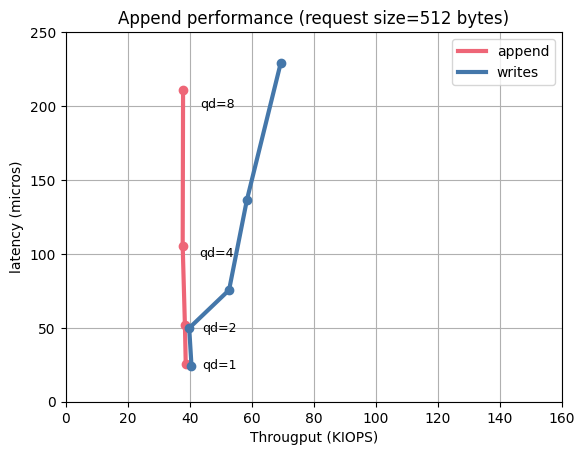

In [35]:
fig, ax = plt.subplots()
plt.xlabel("Througput (KIOPS)")
plt.ylabel("latency (micros)")
plt.title("Append performance (request size=512 bytes)")
ax.grid(True)

qdss = [1,2,4,8]
    
kiops = []
lats = []
for qd in qdss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("spdk"), "zns-a", 
            "lbaf0", "append", 1, qd, 512
            )
        )
    kiops.append(dat.iops_mean / 1000)
    lats.append(dat.lat_mean / 1000)

plt.plot(
    kiops,
    lats,
    linewidth=3,
    label="append",
    color="#EE6677",
)

for i in range(len(kiops)):
            plt.plot(kiops[i], lats[i], "o", color="#EE6677")

lats = [25,50,100,200]
for i in range(len(kiops)): 
    if qdss[i] < 4:
        plt.text((kiops[i]+5) * (1.01), (lats[i]-3) *
                     (1.01), s='qd='+str(qdss[i]), fontsize=9)                
    else:
        plt.text((kiops[i] +5) * (1.01), (lats[i]-3) *
                     (1.01), s='qd='+str(qdss[i]), fontsize=9)

qdss = [1,2,4,8, 16]      
        
kiops = []
lats = []
for qd in qdss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("io_uring"), "zns-a", 
            "lbaf0", "writemq", 1, qd, 512
            )
        )
    kiops.append(dat.iops_mean / 1000)
    lats.append(dat.lat_mean / 1000)
    
plt.plot(
    kiops,
    lats,
    linewidth=3,
    label="writes",
    color="#4477AA",
)

for i in range(len(kiops)):
            plt.plot(kiops[i], lats[i], "o", color="#4477AA")
                
                
plt.xlim(0, 160)
plt.ylim(0, 250)

plt.legend()

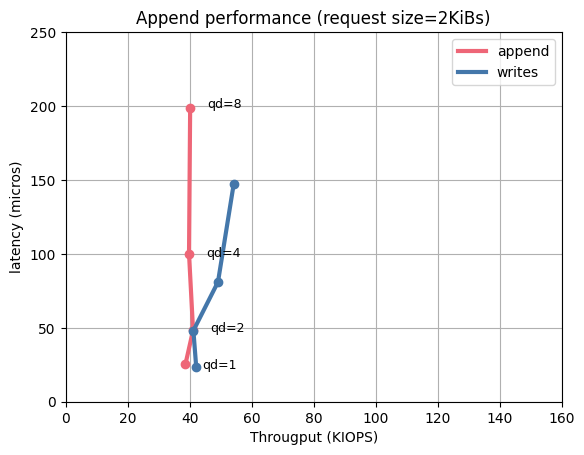

In [36]:
fig, ax = plt.subplots()
plt.xlabel("Througput (KIOPS)")
plt.ylabel("latency (micros)")
plt.title("Append performance (request size=2KiBs)")
ax.grid(True)

qdss = [1,2,4,8]
    
kiops = []
lats = []
for qd in qdss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("spdk"), "zns-a", 
            "lbaf0", "append", 1, qd, 2048
            )
        )
    kiops.append(dat.iops_mean / 1000)
    lats.append(dat.lat_mean / 1000)

plt.plot(
    kiops,
    lats,
    linewidth=3,
    label="append",
    color="#EE6677",
)

for i in range(len(kiops)):
            plt.plot(kiops[i], lats[i], "o", color="#EE6677")

lats = [25,50,100,200]
for i in range(len(kiops)): 
    if qdss[i] < 4:
        plt.text((kiops[i]+5) * (1.01), (lats[i]-3) *
                     (1.01), s='qd='+str(qdss[i]), fontsize=9)                
    else:
        plt.text((kiops[i] +5) * (1.01), (lats[i]-3) *
                     (1.01), s='qd='+str(qdss[i]), fontsize=9)

kiops = []
lats = []
for qd in qdss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("io_uring"), "zns-a", 
            "lbaf0", "writemq", 1, qd, 2048
            )
        )
    kiops.append(dat.iops_mean / 1000)
    lats.append(dat.lat_mean / 1000)
    
plt.plot(
    kiops,
    lats,
    linewidth=3,
    label="writes",
    color="#4477AA",
)

for i in range(len(kiops)):
            plt.plot(kiops[i], lats[i], "o", color="#4477AA")
                
                
plt.xlim(0, 160)
plt.ylim(0, 250)

plt.legend()

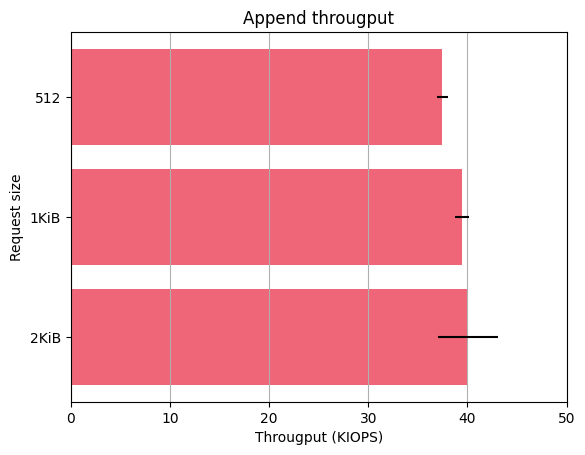

In [37]:
qd = 1
bss = [512, 1024, 2048]

kiops = []
kiopse = []
for bs in bss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("spdk"), "zns-a", 
            "lbaf0", "append", 1, 32, bs
            )
        )
    kiops.append(dat.iops_mean / 1000)
    kiopse.append(dat.iops_stddev / 1000)

    
fig, ax = plt.subplots()
plt.xlabel("Througput (KIOPS)")
plt.ylabel("Request size")
plt.title("Append througput")
ax.xaxis.grid() # horizontal lines
plt.xlim(0, 50)

ax.barh(range(len(bss)), kiops, xerr=kiopse, align='center', color="#EE6677")
ax.set_yticks(range(len(bss)), labels=["512", "1KiB", "2KiB"])
ax.invert_yaxis()  # labels read top-to-bottom

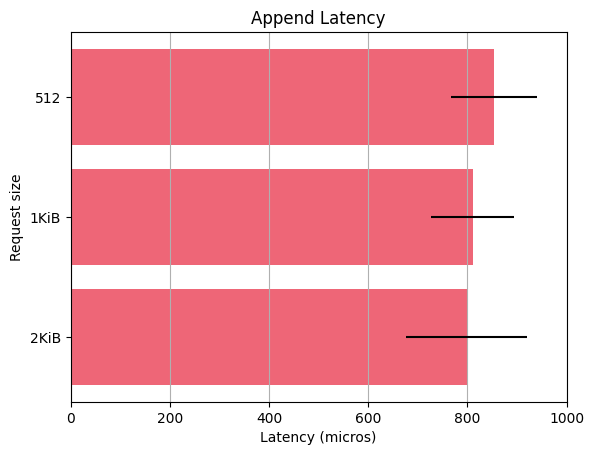

In [38]:
qd = 1
bss = [512, 1024, 2048]

kiops = []
kiopse = []
for bs in bss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("spdk"), "zns-a", 
            "lbaf0", "append", 1, 32, bs
            )
        )
    kiops.append(dat.lat_mean / 1000)
    kiopse.append(dat.lat_stdef / 1000)

    
fig, ax = plt.subplots()
plt.xlabel("Latency (micros)")
plt.ylabel("Request size")
plt.title("Append Latency")
ax.xaxis.grid() # horizontal lines
plt.xlim(0, 1000)

ax.barh(range(len(bss)), kiops, xerr=kiopse, align='center', color="#EE6677")
ax.set_yticks(range(len(bss)), labels=["512", "1KiB", "2KiB"])
ax.invert_yaxis()  # labels read top-to-bottom

# LBAF performance

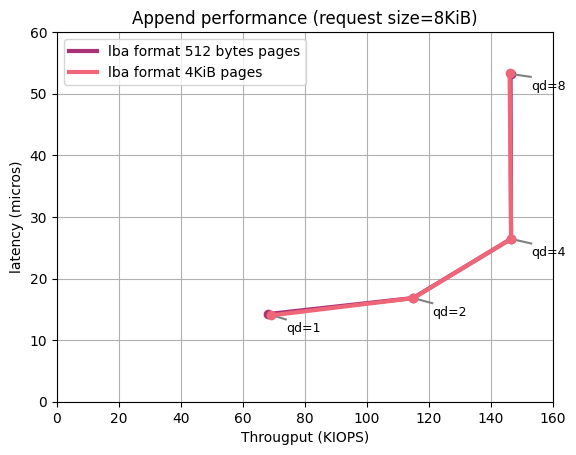

In [39]:
fig, ax = plt.subplots()
plt.xlabel("Througput (KIOPS)")
plt.ylabel("latency (micros)")
plt.title("Append performance (request size=8KiB)")
ax.grid(True)

qdss = [1,2,4,8]
    
kiops = []
lats = []
for qd in qdss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("spdk"), "zns-a", 
            "lbaf0", "append", 1, qd, 8192
            )
        )
    kiops.append(dat.iops_mean / 1000)
    lats.append(dat.lat_mean / 1000)

plt.plot(
    kiops,
    lats,
    linewidth=3,
    label="lba format 512 bytes pages",
    color="#AA3377",
)

for i in range(len(kiops)):
            plt.plot(kiops[i], lats[i], "o", color="#AA3377")
            if qdss[i] < 4:
                plt.text((kiops[i]+5) * (1.01), (lats[i]-3) *
                     (1.01), s='qd='+str(qdss[i]), fontsize=9)                
                plt.plot([(kiops[i]+5) * (1.01), kiops[i]],[(lats[i]-1) *
                     (1.01),lats[i]], color='grey')
            else:
                plt.text((kiops[i] +5) * (1.01), (lats[i]-3) *
                     (1.01), s='qd='+str(qdss[i]), fontsize=9)
                plt.plot([(kiops[i]+5) * (1.01), kiops[i]],[(lats[i]-1) *
                     (1.01),lats[i]], color='grey')

kiops = []
lats = []
for qd in qdss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("spdk"), "zns-a", 
            "lbaf2", "append", 1, qd, 8192
            )
        )
    kiops.append(dat.iops_mean / 1000)
    lats.append(dat.lat_mean / 1000)
    
plt.plot(
    kiops,
    lats,
    linewidth=3,
    label="lba format 4KiB pages",
    color="#EE6677",
)

for i in range(len(kiops)):
            plt.plot(kiops[i], lats[i], "o", color="#EE6677")
                
                
plt.xlim(0, 160)
plt.ylim(0, 60)

plt.legend()

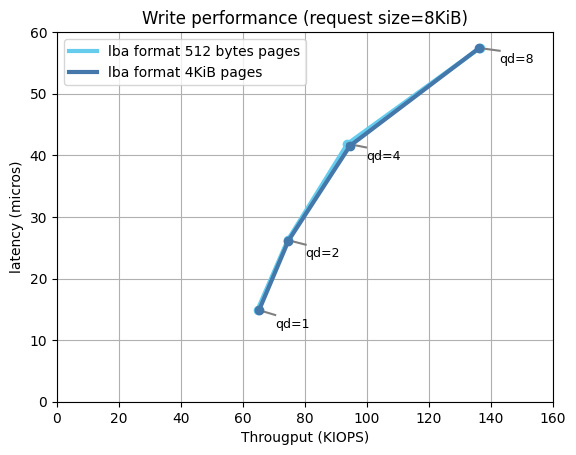

In [40]:
fig, ax = plt.subplots()
plt.xlabel("Througput (KIOPS)")
plt.ylabel("latency (micros)")
plt.title("Write performance (request size=8KiB)")
ax.grid(True)

qdss = [1,2,4,8]
    
kiops = []
lats = []
for qd in qdss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("io_uring"), "zns-a", 
            "lbaf0", "writemq", 1, qd, 8192
            )
        )
    kiops.append(dat.iops_mean / 1000)
    lats.append(dat.lat_mean / 1000)

plt.plot(
    kiops,
    lats,
    linewidth=3,
    label="lba format 512 bytes pages",
    color="#66CCEE",
)

for i in range(len(kiops)):
            plt.plot(kiops[i], lats[i], "o", color="#66CCEE")
            if qdss[i] < 4:
                plt.text((kiops[i]+5) * (1.01), (lats[i]-3) *
                     (1.01), s='qd='+str(qdss[i]), fontsize=9)                
                plt.plot([(kiops[i]+5) * (1.01), kiops[i]],[(lats[i]-1) *
                     (1.01),lats[i]], color='grey')
            else:
                plt.text((kiops[i] +5) * (1.01), (lats[i]-3) *
                     (1.01), s='qd='+str(qdss[i]), fontsize=9)
                plt.plot([(kiops[i]+5) * (1.01), kiops[i]],[(lats[i]-1) *
                     (1.01),lats[i]], color='grey')

kiops = []
lats = []
for qd in qdss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("io_uring"), "zns-a", 
            "lbaf2", "writemq", 1, qd, 8192
            )
        )
    kiops.append(dat.iops_mean / 1000)
    lats.append(dat.lat_mean / 1000)
    
plt.plot(
    kiops,
    lats,
    linewidth=3,
    label="lba format 4KiB pages",
    color="#4477AA",
)

for i in range(len(kiops)):
            plt.plot(kiops[i], lats[i], "o", color="#4477AA")
                
                
plt.xlim(0, 160)
plt.ylim(0, 60)

plt.legend()

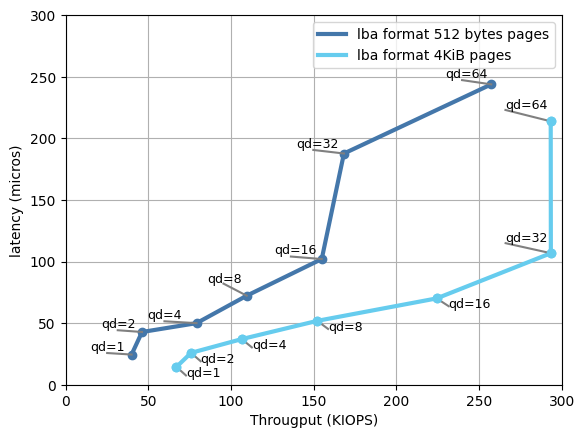

In [41]:
fig, ax = plt.subplots()
plt.xlabel("Througput (KIOPS)")
plt.ylabel("latency (micros)")
#plt.title("Write performance (request size=4KiB)")
ax.grid(True)

qdss = [1,2,4,8,16,32,64]
    
kiops = []
lats = []
for qd in qdss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("io_uring"), "zns-a", 
            "lbaf0", "writemq", 1, qd, 4096
            )
        )
    kiops.append(dat.iops_mean / 1000)
    lats.append(dat.lat_mean / 1000)

plt.plot(
    kiops,
    lats,
    linewidth=3,
    label="lba format 512 bytes pages",
    color="#4477AA",
)

for i in range(len(kiops)):
            plt.plot(kiops[i], lats[i], "o", color="#4477AA")
            if qdss[i] < 4:
                plt.text((kiops[i]-25) * (1.01), (lats[i]+3) *
                     (1.01), s='qd='+str(qdss[i]), fontsize=9)                
                plt.plot([(kiops[i]-15) * (1.01), kiops[i]],[(lats[i]+1) *
                     (1.01),lats[i]], color='grey')
            elif qdss[i] == 8:
                plt.text((kiops[i]-25) * (1.01), (lats[i]+10) *
                     (1.01), s='qd='+str(qdss[i]), fontsize=9)                
                plt.plot([(kiops[i]-15) * (1.01), kiops[i]],[(lats[i]+9) *
                     (1.01),lats[i]], color='grey')
            else:
                plt.text((kiops[i] - 30) * (1.01), (lats[i]+3) *
                     (1.01), s='qd='+str(qdss[i]), fontsize=9)
                plt.plot([(kiops[i] -20) * (1.01), kiops[i]],[(lats[i]+1) *
                     (1.01),lats[i]], color='grey')

kiops = []
lats = []
for qd in qdss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("io_uring"), "zns-a", 
            "lbaf2", "writemq", 1, qd, 4096
            )
        )
    kiops.append(dat.iops_mean / 1000)
    lats.append(dat.lat_mean / 1000)
    
plt.plot(
    kiops,
    lats,
    linewidth=3,
    label="lba format 4KiB pages",
    color="#66CCEE",
)

for i in range(len(kiops)):
            plt.plot(kiops[i], lats[i], "o", color="#66CCEE")
            if qdss[i] < 4:
                plt.text((kiops[i]+5) * (1.01), (lats[i]-8) *
                     (1.01), s='qd='+str(qdss[i]), fontsize=9)                
                plt.plot([(kiops[i]+5) * (1.01), kiops[i]],[(lats[i]-7) *
                     (1.01),lats[i]], color='grey')
            elif qdss[i] > 16:
                plt.text((kiops[i] -30) * (1.01), (lats[i]+8) *
                     (1.01), s='qd='+str(qdss[i]), fontsize=9)
                plt.plot([(kiops[i]-30) * (1.01), kiops[i]],[(lats[i]+7) *
                     (1.01),lats[i]], color='grey')
            else:
                plt.text((kiops[i] +5) * (1.01), (lats[i]-8) *
                     (1.01), s='qd='+str(qdss[i]), fontsize=9)
                plt.plot([(kiops[i]+5) * (1.01), kiops[i]],[(lats[i]-7) *
                     (1.01),lats[i]], color='grey')

for i in range(len(kiops)):
            plt.plot(kiops[i], lats[i], "o", color="#66CCEE")
                
                
plt.xlim(0, 300)
plt.ylim(0, 300)

plt.legend()
fig.savefig("/mnt/data/projects/vu/paper-zns-measurements/supplements/lbaf_diff_4k_writes.pdf")

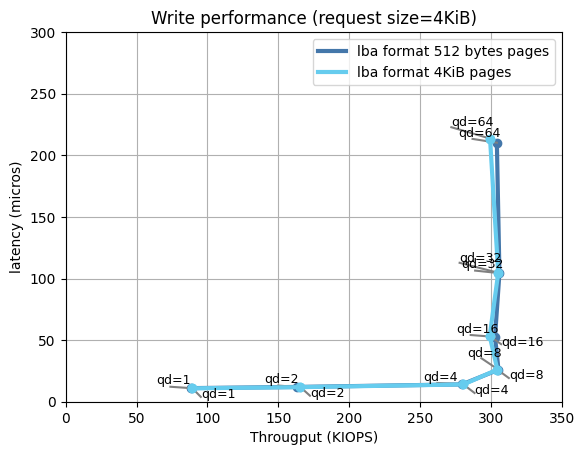

In [43]:
fig, ax = plt.subplots()
plt.xlabel("Througput (KIOPS)")
plt.ylabel("latency (micros)")
plt.title("Write performance (request size=4KiB)")
ax.grid(True)

qdss = [1,2,4,8,16,32,64]
    
kiops = []
lats = []
for qd in qdss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("io_uring"), "nvme-a", 
            "lbaf0", "write", 1, qd, 4096
            )
        )
    kiops.append(dat.iops_mean / 1000)
    lats.append(dat.lat_mean / 1000)

plt.plot(
    kiops,
    lats,
    linewidth=3,
    label="lba format 512 bytes pages",
    color="#4477AA",
)

for i in range(len(kiops)):
            plt.plot(kiops[i], lats[i], "o", color="#4477AA")
            if qdss[i] < 4:
                plt.text((kiops[i]-25) * (1.01), (lats[i]+3) *
                     (1.01), s='qd='+str(qdss[i]), fontsize=9)                
                plt.plot([(kiops[i]-15) * (1.01), kiops[i]],[(lats[i]+1) *
                     (1.01),lats[i]], color='grey')
            elif qdss[i] == 8:
                plt.text((kiops[i]-25) * (1.01), (lats[i]+10) *
                     (1.01), s='qd='+str(qdss[i]), fontsize=9)                
                plt.plot([(kiops[i]-15) * (1.01), kiops[i]],[(lats[i]+9) *
                     (1.01),lats[i]], color='grey')
            else:
                plt.text((kiops[i] - 30) * (1.01), (lats[i]+3) *
                     (1.01), s='qd='+str(qdss[i]), fontsize=9)
                plt.plot([(kiops[i] -20) * (1.01), kiops[i]],[(lats[i]+1) *
                     (1.01),lats[i]], color='grey')

kiops = []
lats = []
for qd in qdss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("io_uring"), "nvme-a", 
            "lbaf3", "write", 1, qd, 4096
            )
        )
    kiops.append(dat.iops_mean / 1000)
    lats.append(dat.lat_mean / 1000)
    
plt.plot(
    kiops,
    lats,
    linewidth=3,
    label="lba format 4KiB pages",
    color="#66CCEE",
)

for i in range(len(kiops)):
            plt.plot(kiops[i], lats[i], "o", color="#66CCEE")
            if qdss[i] < 4:
                plt.text((kiops[i]+5) * (1.01), (lats[i]-8) *
                     (1.01), s='qd='+str(qdss[i]), fontsize=9)                
                plt.plot([(kiops[i]+5) * (1.01), kiops[i]],[(lats[i]-7) *
                     (1.01),lats[i]], color='grey')
            elif qdss[i] > 16:
                plt.text((kiops[i] -30) * (1.01), (lats[i]+8) *
                     (1.01), s='qd='+str(qdss[i]), fontsize=9)
                plt.plot([(kiops[i]-30) * (1.01), kiops[i]],[(lats[i]+7) *
                     (1.01),lats[i]], color='grey')
            else:
                plt.text((kiops[i] +5) * (1.01), (lats[i]-8) *
                     (1.01), s='qd='+str(qdss[i]), fontsize=9)
                plt.plot([(kiops[i]+5) * (1.01), kiops[i]],[(lats[i]-7) *
                     (1.01),lats[i]], color='grey')

for i in range(len(kiops)):
            plt.plot(kiops[i], lats[i], "o", color="#66CCEE")
                
                
plt.xlim(0, 350)
plt.ylim(0, 300)

plt.legend()

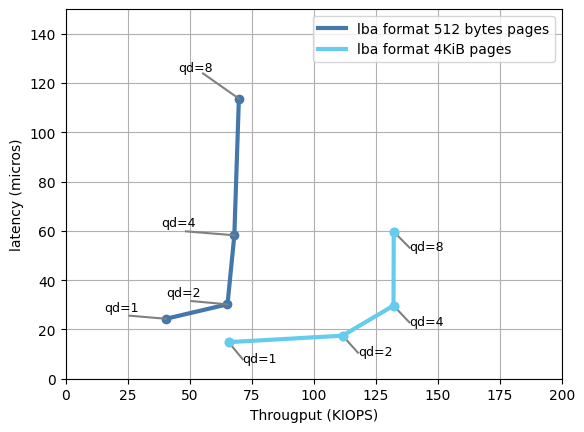

In [46]:
fig, ax = plt.subplots()
plt.xlabel("Througput (KIOPS)")
plt.ylabel("latency (micros)")
#plt.title("Write performance (request size=4KiB)")
ax.grid(True)

qdss = [1,2,4,8]
    
kiops = []
lats = []
for qd in qdss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("spdk"), "zns-a", 
            "lbaf0", "append", 1, qd, 4096
            )
        )
    kiops.append(dat.iops_mean / 1000)
    lats.append(dat.lat_mean / 1000)

plt.plot(
    kiops,
    lats,
    linewidth=3,
    label="lba format 512 bytes pages",
    color="#4477AA",
)

for i in range(len(kiops)):
            plt.plot(kiops[i], lats[i], "o", color="#4477AA")
            if qdss[i] < 4:
                plt.text((kiops[i]-25) * (1.01), (lats[i]+3) *
                     (1.01), s='qd='+str(qdss[i]), fontsize=9)                
                plt.plot([(kiops[i]-15) * (1.01), kiops[i]],[(lats[i]+1) *
                     (1.01),lats[i]], color='grey')
            elif qdss[i] == 8:
                plt.text((kiops[i]-25) * (1.01), (lats[i]+10) *
                     (1.01), s='qd='+str(qdss[i]), fontsize=9)                
                plt.plot([(kiops[i]-15) * (1.01), kiops[i]],[(lats[i]+9) *
                     (1.01),lats[i]], color='grey')
            else:
                plt.text((kiops[i] - 30) * (1.01), (lats[i]+3) *
                     (1.01), s='qd='+str(qdss[i]), fontsize=9)
                plt.plot([(kiops[i] -20) * (1.01), kiops[i]],[(lats[i]+1) *
                     (1.01),lats[i]], color='grey')

kiops = []
lats = []
for qd in qdss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("spdk"), "zns-a", 
            "lbaf2", "append", 1, qd, 4096
            )
        )
    kiops.append(dat.iops_mean / 1000)
    lats.append(dat.lat_mean / 1000)
    
plt.plot(
    kiops,
    lats,
    linewidth=3,
    label="lba format 4KiB pages",
    color="#66CCEE",
)

for i in range(len(kiops)):
            plt.plot(kiops[i], lats[i], "o", color="#66CCEE")
            if qdss[i] < 4:
                plt.text((kiops[i]+5) * (1.01), (lats[i]-8) *
                     (1.01), s='qd='+str(qdss[i]), fontsize=9)                
                plt.plot([(kiops[i]+5) * (1.01), kiops[i]],[(lats[i]-7) *
                     (1.01),lats[i]], color='grey')
            elif qdss[i] > 16:
                plt.text((kiops[i] -30) * (1.01), (lats[i]+8) *
                     (1.01), s='qd='+str(qdss[i]), fontsize=9)
                plt.plot([(kiops[i]-30) * (1.01), kiops[i]],[(lats[i]+7) *
                     (1.01),lats[i]], color='grey')
            else:
                plt.text((kiops[i] +5) * (1.01), (lats[i]-8) *
                     (1.01), s='qd='+str(qdss[i]), fontsize=9)
                plt.plot([(kiops[i]+5) * (1.01), kiops[i]],[(lats[i]-7) *
                     (1.01),lats[i]], color='grey')

for i in range(len(kiops)):
            plt.plot(kiops[i], lats[i], "o", color="#66CCEE")
                
                
plt.xlim(0, 200)
plt.ylim(0, 150)

plt.legend()

fig.savefig("/mnt/data/projects/vu/paper-zns-measurements/supplements/lbaf_diff_4k_appends.pdf")

# NVMe versus ZNS

In [ ]:
qd = 32
bss = [4096, 8192, 16384, 32768, 65536, 131072]

kiops = []
kiopse = []
for bs in bss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("spdk"), "nvme-a", 
            "lbaf3", "write", 1, qd, bs
            )
        )
    kiops.append(dat.iops_mean / 1000)
    kiopse.append(dat.iops_stddev / 1000)

    
fig, ax = plt.subplots()
plt.xlabel("Througput (KIOPS)")
plt.ylabel("Request size")
plt.title("Write througput (NVMe)")
ax.xaxis.grid() # horizontal lines
plt.xlim(0, 320)

ax.barh(range(len(bss)), kiops, xerr=kiopse, align='center', color="#228833")
ax.set_yticks(range(len(bss)), labels=["4KiB", "8KiB", "16KiB", "32KiB", "64KiB", "128KiB"])
ax.invert_yaxis()  # labels read top-to-bottom

# Write rand (NVMe)

In [ ]:
qd = 32
bss = [4096, 8192, 16384, 32768, 65536, 131072]

kiops = []
kiopse = []
for bs in bss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("spdk"), "nvme-a", 
            "lbaf3", "writerand", 1, qd, bs
            )
        )
    kiops.append(dat.iops_mean / 1000)
    kiopse.append(dat.iops_stddev / 1000)

    
fig, ax = plt.subplots()
plt.xlabel("Througput (KIOPS)")
plt.ylabel("Request size")
plt.title("Write througput (QD=32)")
ax.xaxis.grid() # horizontal lines
plt.xlim(0, 320)

ax.barh(range(len(bss)), kiops, xerr=kiopse, align='center', color="#228833")
ax.set_yticks(range(len(bss)), labels=["4KiB", "8KiB", "16KiB", "32KiB", "64KiB", "128KiB"])
ax.invert_yaxis()  # labels read top-to-bottom

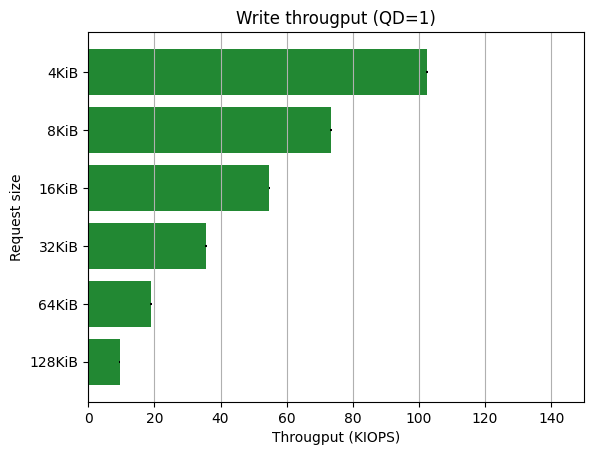

In [13]:
# Marker 3
qd = 1
bss = [4096, 8192, 16384, 32768, 65536, 131072]

kiops = []
kiopse = []
for bs in bss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("spdk"), "nvme-a", 
            "lbaf3", "writerand", 1, qd, bs
            )
        )
    kiops.append(dat.iops_mean / 1000)
    kiopse.append(dat.iops_stddev / 1000)

    
fig, ax = plt.subplots()
plt.xlabel("Througput (KIOPS)")
plt.ylabel("Request size")
plt.title("Write througput (QD=1)")
ax.xaxis.grid() # horizontal lines
plt.xlim(0, 150)

ax.barh(range(len(bss)), kiops, xerr=kiopse, align='center', color="#228833")
ax.set_yticks(range(len(bss)), labels=["4KiB", "8KiB", "16KiB", "32KiB", "64KiB", "128KiB"])
ax.invert_yaxis()  # labels read top-to-bottom

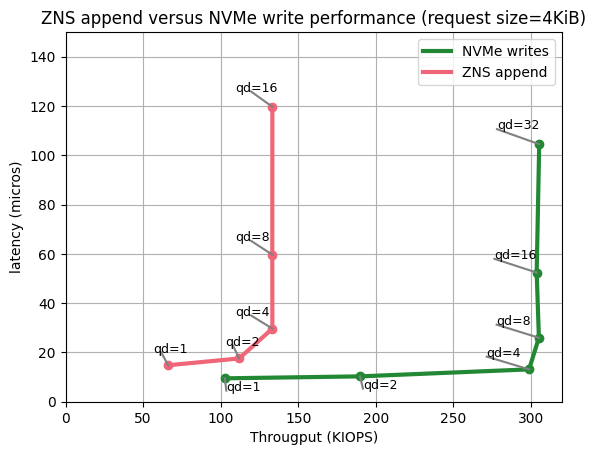

In [12]:
fig, ax = plt.subplots()
plt.xlabel("Througput (KIOPS)")
plt.ylabel("latency (micros)")
plt.title("ZNS append versus NVMe write performance (request size=4KiB)")
ax.grid(True)

qdss = [1,2,4,8,16,32]

kiops = []
lats = []
for qd in qdss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("spdk"), "nvme-a", 
            "lbaf3", "write", 1, qd, 4096
            )
        )
    kiops.append(dat.iops_mean / 1000)
    lats.append(dat.lat_mean / 1000)
    
plt.plot(
    kiops,
    lats,
    linewidth=3,
    label="NVMe writes",
    color="#228833",
)

for i in range(len(kiops)):
            plt.plot(kiops[i], lats[i], "o", color="#228833")
            if qdss[i] < 4:
                plt.text(kiops[i] * (1.01), (lats[i] - 5) *
                     (1.01), s='qd='+str(qdss[i]), fontsize=9)                
                plt.plot([(kiops[i]) * (1.01), kiops[i]],[(lats[i]-5) *
                     (1.01),lats[i]], color='grey')
            else:
                plt.text((kiops[i]-30) * (1.01), (lats[i] + 5) *
                     (1.01), s='qd='+str(qdss[i]), fontsize=9)
                plt.plot([(kiops[i]-30)  * (1.01), kiops[i]],[(lats[i]+5) *
                     (1.01),lats[i]], color='grey')
    
qdss = [1,2,4,8,16]
kiops = []
lats = []
for qd in qdss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("spdk"), "zns-a", 
            "lbaf3", "append", 1, qd, 4096
            )
        )
    kiops.append(dat.iops_mean / 1000)
    lats.append(dat.lat_mean / 1000)

plt.plot(
    kiops,
    lats,
    linewidth=3,
    label="ZNS append",
    color="#EE6677",
)

for i in range(len(kiops)):
            plt.plot(kiops[i], lats[i], "o", color="#EE6677")
            if qdss[i] < 4:
                plt.text((kiops[i] - 10) * (1.01), (lats[i] + 5) *
                         (1.01), s='qd='+str(qdss[i]), fontsize=9)
                plt.plot([(kiops[i] - 5) * (1.01), kiops[i]],[(lats[i]+5) *
                     (1.01),lats[i]], color='grey')
            else:
                plt.text((kiops[i] - 25) * (1.01), (lats[i] + 5) *
                     (1.01), s='qd='+str(qdss[i]), fontsize=9)
                plt.plot([(kiops[i] - 15) * (1.01), kiops[i]],[(lats[i]+5) *
                     (1.01),lats[i]], color='grey')

plt.xlim(0, 320)
plt.ylim(0, 150)
plt.legend()

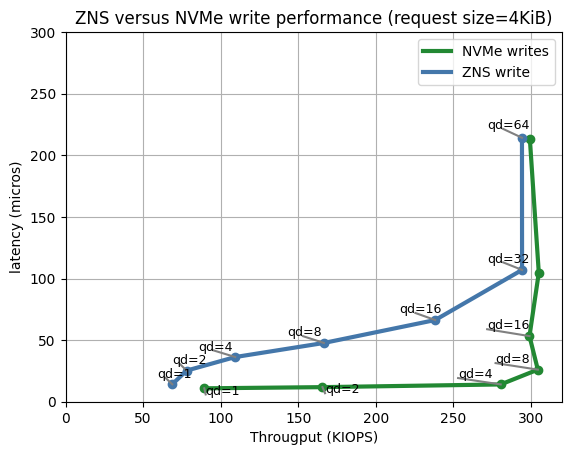

In [11]:
fig, ax = plt.subplots()
plt.xlabel("Througput (KIOPS)")
plt.ylabel("latency (micros)")
plt.title("ZNS versus NVMe write performance (request size=4KiB)")
ax.grid(True)

qdss = [1,2,4,8,16,32,64]

kiops = []
lats = []
for qd in qdss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("io_uring"), "nvme-a", 
            "lbaf3", "write", 1, qd, 4096
            )
        )
    kiops.append(dat.iops_mean / 1000)
    lats.append(dat.lat_mean / 1000)
    
plt.plot(
    kiops,
    lats,
    linewidth=3,
    label="NVMe writes",
    color="#228833",
)

for i in range(len(kiops)):
            plt.plot(kiops[i], lats[i], "o", color="#228833")
            if qdss[i] < 4:
                plt.text(kiops[i] * (1.01), (lats[i] - 5) *
                     (1.01), s='qd='+str(qdss[i]), fontsize=9)                
                plt.plot([(kiops[i]) * (1.01), kiops[i]],[(lats[i]-5) *
                     (1.01),lats[i]], color='grey')
            elif qdss[i] >= 32:
                pass
            else:
                plt.text((kiops[i]-30) * (1.01), (lats[i] + 5) *
                     (1.01), s='qd='+str(qdss[i]), fontsize=9)
                plt.plot([(kiops[i]-30)  * (1.01), kiops[i]],[(lats[i]+5) *
                     (1.01),lats[i]], color='grey')
    
qdss = [1,2,4,8,16,32,64]
kiops = []
lats = []
for qd in qdss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("io_uring"), "zns-a", 
            "lbaf3", "writemq", 1, qd, 4096
            )
        )
    kiops.append(dat.iops_mean / 1000)
    lats.append(dat.lat_mean / 1000)

plt.plot(
    kiops,
    lats,
    linewidth=3,
    label="ZNS write",
    color="#4477AA",
)

for i in range(len(kiops)):
            plt.plot(kiops[i], lats[i], "o", color="#4477AA")
            if qdss[i] < 4:
                plt.text((kiops[i] - 10) * (1.01), (lats[i] + 5) *
                         (1.01), s='qd='+str(qdss[i]), fontsize=9)
                plt.plot([(kiops[i] - 5) * (1.01), kiops[i]],[(lats[i]+5) *
                     (1.01),lats[i]], color='grey')
            else:
                plt.text((kiops[i] - 25) * (1.01), (lats[i] + 5) *
                     (1.01), s='qd='+str(qdss[i]), fontsize=9)
                plt.plot([(kiops[i] - 15) * (1.01), kiops[i]],[(lats[i]+5) *
                     (1.01),lats[i]], color='grey')

plt.xlim(0, 320)
plt.ylim(0, 300)
plt.legend()

# NVMe vs NVMe

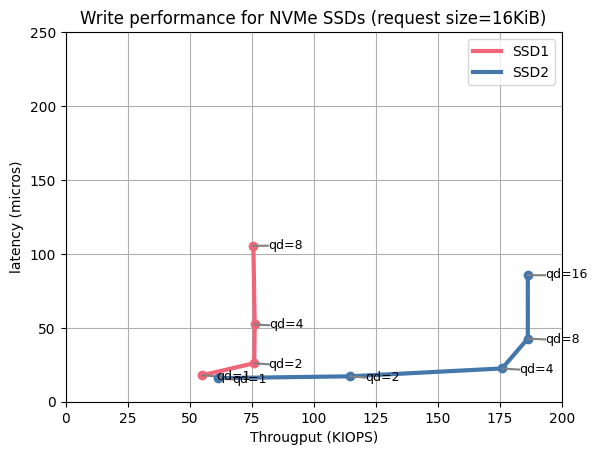

In [9]:
fig, ax = plt.subplots()
plt.xlabel("Througput (KIOPS)")
plt.ylabel("latency (micros)")
plt.title("Write performance for NVMe SSDs (request size=16KiB)")
ax.grid(True)

qdss = [1,2,4,8]
bss = [512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072]
    
kiops = []
lats = []
for qd in qdss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("spdk"), "nvme-a", 
            "lbaf0", "write", 1, qd, 16384
            )
        )
    kiops.append(dat.iops_mean / 1000)
    lats.append(dat.lat_mean / 1000)

plt.plot(
    kiops,
    lats,
    linewidth=3,
    label="SSD1",
    color="#EE6677",
)

for i in range(len(kiops)):
            plt.plot(kiops[i], lats[i], "o", color="#EE6677")
            if qdss[i] < 4:
                plt.text((kiops[i]+5) * (1.01), (lats[i]-3) *
                     (1.01), s='qd='+str(qdss[i]), fontsize=9)                
                plt.plot([(kiops[i]+5) * (1.01), kiops[i]],[(lats[i]-1) *
                     (1.01),lats[i]], color='grey')
            else:
                plt.text((kiops[i] +5) * (1.01), (lats[i]-3) *
                     (1.01), s='qd='+str(qdss[i]), fontsize=9)
                plt.plot([(kiops[i]+5) * (1.01), kiops[i]],[(lats[i]-1) *
                     (1.01),lats[i]], color='grey')

qdss = [1,2,4,8,16]
kiops = []
lats = []
for qd in qdss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("io_uring"), "nvme-b", 
            "lbaf0", "write", 1, qd, 16384
            )
        )
    kiops.append(dat.iops_mean / 1000)
    lats.append(dat.lat_mean / 1000)
    
plt.plot(
    kiops,
    lats,
    linewidth=3,
    label="SSD2",
    color="#4477AA",
)

for i in range(len(kiops)):
            plt.plot(kiops[i], lats[i], "o", color="#4477AA")
            if qdss[i] < 4:
                plt.text((kiops[i]+5) * (1.01), (lats[i]-3) *
                     (1.01), s='qd='+str(qdss[i]), fontsize=9)                
                plt.plot([(kiops[i]+5) * (1.01), kiops[i]],[(lats[i]-1) *
                     (1.01),lats[i]], color='grey')
            else:
                plt.text((kiops[i] +5) * (1.01), (lats[i]-3) *
                     (1.01), s='qd='+str(qdss[i]), fontsize=9)
                plt.plot([(kiops[i]+5) * (1.01), kiops[i]],[(lats[i]-1) *
                     (1.01),lats[i]], color='grey')
                
                
plt.xlim(0, 200)
plt.ylim(0, 250)

plt.legend()

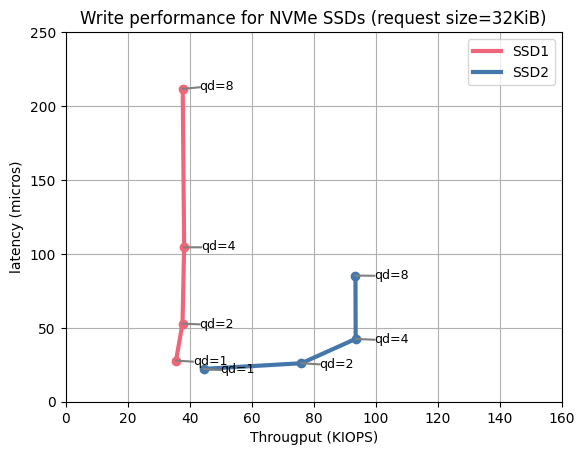

In [10]:
# ... MARKER 2 ...
fig, ax = plt.subplots()
plt.xlabel("Througput (KIOPS)")
plt.ylabel("latency (micros)")
plt.title("Write performance for NVMe SSDs (request size=32KiB)")
ax.grid(True)

qdss = [1,2,4,8]
bss = [512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072]
    
kiops = []
lats = []
for qd in qdss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("spdk"), "nvme-a", 
            "lbaf0", "write", 1, qd, 32768
            )
        )
    kiops.append(dat.iops_mean / 1000)
    lats.append(dat.lat_mean / 1000)

plt.plot(
    kiops,
    lats,
    linewidth=3,
    label="SSD1",
    color="#EE6677",
)

for i in range(len(kiops)):
            plt.plot(kiops[i], lats[i], "o", color="#EE6677")
            if qdss[i] < 4:
                plt.text((kiops[i]+5) * (1.01), (lats[i]-3) *
                     (1.01), s='qd='+str(qdss[i]), fontsize=9)                
                plt.plot([(kiops[i]+5) * (1.01), kiops[i]],[(lats[i]-1) *
                     (1.01),lats[i]], color='grey')
            else:
                plt.text((kiops[i] +5) * (1.01), (lats[i]-3) *
                     (1.01), s='qd='+str(qdss[i]), fontsize=9)
                plt.plot([(kiops[i]+5) * (1.01), kiops[i]],[(lats[i]-1) *
                     (1.01),lats[i]], color='grey')

kiops = []
lats = []
for qd in qdss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("io_uring"), "nvme-b", 
            "lbaf0", "write", 1, qd, 32768
            )
        )
    kiops.append(dat.iops_mean / 1000)
    lats.append(dat.lat_mean / 1000)
    
plt.plot(
    kiops,
    lats,
    linewidth=3,
    label="SSD2",
    color="#4477AA",
)

for i in range(len(kiops)):
            plt.plot(kiops[i], lats[i], "o", color="#4477AA")
            if qdss[i] < 4:
                plt.text((kiops[i]+5) * (1.01), (lats[i]-3) *
                     (1.01), s='qd='+str(qdss[i]), fontsize=9)                
                plt.plot([(kiops[i]+5) * (1.01), kiops[i]],[(lats[i]-1) *
                     (1.01),lats[i]], color='grey')
            else:
                plt.text((kiops[i] +5) * (1.01), (lats[i]-3) *
                     (1.01), s='qd='+str(qdss[i]), fontsize=9)
                plt.plot([(kiops[i]+5) * (1.01), kiops[i]],[(lats[i]-1) *
                     (1.01),lats[i]], color='grey')
                
                
plt.xlim(0, 160)
plt.ylim(0, 250)

plt.legend()

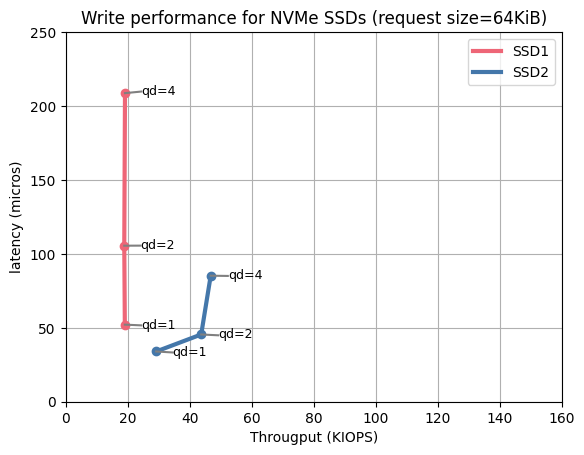

In [8]:
# ... MARKER 2 ...
fig, ax = plt.subplots()
plt.xlabel("Througput (KIOPS)")
plt.ylabel("latency (micros)")
plt.title("Write performance for NVMe SSDs (request size=64KiB)")
ax.grid(True)

qdss = [1,2,4]
bss = [512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072]
    
kiops = []
lats = []
for qd in qdss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("spdk"), "nvme-a", 
            "lbaf0", "write", 1, qd, 65536
            )
        )
    kiops.append(dat.iops_mean / 1000)
    lats.append(dat.lat_mean / 1000)

plt.plot(
    kiops,
    lats,
    linewidth=3,
    label="SSD1",
    color="#EE6677",
)

for i in range(len(kiops)):
            plt.plot(kiops[i], lats[i], "o", color="#EE6677")
            if qdss[i] < 4:
                plt.text((kiops[i]+5) * (1.01), (lats[i]-3) *
                     (1.01), s='qd='+str(qdss[i]), fontsize=9)                
                plt.plot([(kiops[i]+5) * (1.01), kiops[i]],[(lats[i]-1) *
                     (1.01),lats[i]], color='grey')
            else:
                plt.text((kiops[i] +5) * (1.01), (lats[i]-3) *
                     (1.01), s='qd='+str(qdss[i]), fontsize=9)
                plt.plot([(kiops[i]+5) * (1.01), kiops[i]],[(lats[i]-1) *
                     (1.01),lats[i]], color='grey')

kiops = []
lats = []
for qd in qdss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("io_uring"), "nvme-b", 
            "lbaf0", "write", 1, qd, 65536
            )
        )
    kiops.append(dat.iops_mean / 1000)
    lats.append(dat.lat_mean / 1000)
    
plt.plot(
    kiops,
    lats,
    linewidth=3,
    label="SSD2",
    color="#4477AA",
)

for i in range(len(kiops)):
            plt.plot(kiops[i], lats[i], "o", color="#4477AA")
            if qdss[i] < 4:
                plt.text((kiops[i]+5) * (1.01), (lats[i]-3) *
                     (1.01), s='qd='+str(qdss[i]), fontsize=9)                
                plt.plot([(kiops[i]+5) * (1.01), kiops[i]],[(lats[i]-1) *
                     (1.01),lats[i]], color='grey')
            else:
                plt.text((kiops[i] +5) * (1.01), (lats[i]-3) *
                     (1.01), s='qd='+str(qdss[i]), fontsize=9)
                plt.plot([(kiops[i]+5) * (1.01), kiops[i]],[(lats[i]-1) *
                     (1.01),lats[i]], color='grey')
                
                
plt.xlim(0, 160)
plt.ylim(0, 250)

plt.legend()

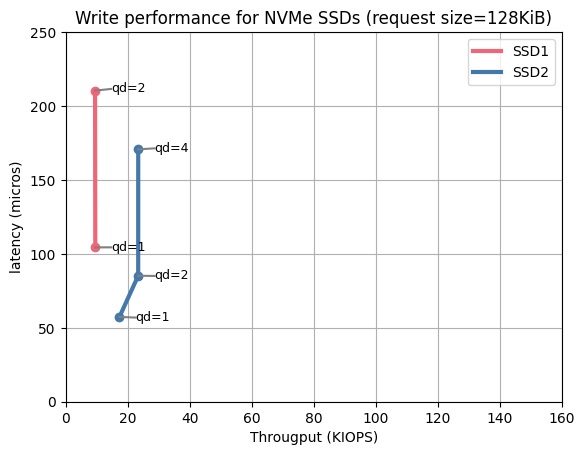

In [7]:
# ... MARKER 2 ...
fig, ax = plt.subplots()
plt.xlabel("Througput (KIOPS)")
plt.ylabel("latency (micros)")
plt.title("Write performance for NVMe SSDs (request size=128KiB)")
ax.grid(True)

qdss = [1,2]
bss = [512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072]
    
kiops = []
lats = []
for qd in qdss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("spdk"), "nvme-a", 
            "lbaf0", "write", 1, qd, 131072
            )
        )
    kiops.append(dat.iops_mean / 1000)
    lats.append(dat.lat_mean / 1000)

plt.plot(
    kiops,
    lats,
    linewidth=3,
    label="SSD1",
    color="#EE6677",
)

for i in range(len(kiops)):
            plt.plot(kiops[i], lats[i], "o", color="#EE6677")
            if qdss[i] < 4:
                plt.text((kiops[i]+5) * (1.01), (lats[i]-3) *
                     (1.01), s='qd='+str(qdss[i]), fontsize=9)                
                plt.plot([(kiops[i]+5) * (1.01), kiops[i]],[(lats[i]-1) *
                     (1.01),lats[i]], color='grey')
            else:
                plt.text((kiops[i] +5) * (1.01), (lats[i]-3) *
                     (1.01), s='qd='+str(qdss[i]), fontsize=9)
                plt.plot([(kiops[i]+5) * (1.01), kiops[i]],[(lats[i]-1) *
                     (1.01),lats[i]], color='grey')

qdss = [1,2,4]
kiops = []
lats = []
for qd in qdss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("io_uring"), "nvme-b", 
            "lbaf0", "write", 1, qd, 131072
            )
        )
    kiops.append(dat.iops_mean / 1000)
    lats.append(dat.lat_mean / 1000)
    
plt.plot(
    kiops,
    lats,
    linewidth=3,
    label="SSD2",
    color="#4477AA",
)

for i in range(len(kiops)):
            plt.plot(kiops[i], lats[i], "o", color="#4477AA")
            if qdss[i] < 4:
                plt.text((kiops[i]+5) * (1.01), (lats[i]-3) *
                     (1.01), s='qd='+str(qdss[i]), fontsize=9)                
                plt.plot([(kiops[i]+5) * (1.01), kiops[i]],[(lats[i]-1) *
                     (1.01),lats[i]], color='grey')
            else:
                plt.text((kiops[i] +5) * (1.01), (lats[i]-3) *
                     (1.01), s='qd='+str(qdss[i]), fontsize=9)
                plt.plot([(kiops[i]+5) * (1.01), kiops[i]],[(lats[i]-1) *
                     (1.01),lats[i]], color='grey')
                
                
plt.xlim(0, 160)
plt.ylim(0, 250)

plt.legend()

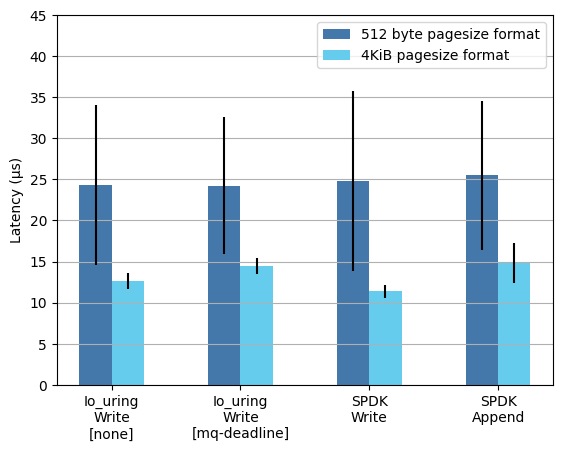

In [25]:
# Marker 3
fig, ax = plt.subplots()

kiops_512 = []
kiopse_512 = []
for path in [
           BenchPath(
            string_to_io_engine("io_uring"), "zns-a", 
            "lbaf0", "write", 1, 1, 512
            ),
            BenchPath(
            string_to_io_engine("io_uring"), "zns-a", 
            "lbaf0", "writemq", 1, 1, 512
            ),
            BenchPath(
            string_to_io_engine("spdk"), "zns-a", 
            "lbaf0", "write", 1, 1, 512
            ),
            BenchPath(
            string_to_io_engine("spdk"), "zns-a", 
            "lbaf0", "append", 1, 1, 512
            )
]:
    dat = parse_fio_file(path)
    kiops_512.append(dat.lat_mean / 1000)
    kiopse_512.append(dat.lat_stdef / 1000)
ax.bar([x-0.125 for x in range(4)], kiops_512, yerr=kiopse_512, align='center', color="#4477AA", width=0.25, label="512 byte pagesize format")

kiops_4k = []
kiopse_4k = []
for path in [
           BenchPath(
            string_to_io_engine("io_uring"), "zns-a", 
            "lbaf2", "write", 1, 1, 4096
            ),
            BenchPath(
            string_to_io_engine("io_uring"), "zns-a", 
            "lbaf2", "writemq", 1, 1, 4096
            ),
            BenchPath(
            string_to_io_engine("spdk"), "zns-a", 
            "lbaf2", "write", 1, 1, 4096
            ),
            BenchPath(
            string_to_io_engine("spdk"), "zns-a", 
            "lbaf2", "append", 1, 1, 4096
            )
]:
    dat = parse_fio_file(path)
    kiops_4k.append(dat.lat_mean / 1000)
    kiopse_4k.append(dat.lat_stdef / 1000)
ax.bar([x+0.125 for x in range(4)], kiops_4k, yerr=kiopse_4k, align='center', color="#66CCEE", width=0.25, label="4KiB pagesize format")



#plt.xlabel("Througput (KIOPS)")
plt.ylabel("Latency (μs)")
#plt.title("Write througput (QD=1)")
ax.yaxis.grid() # horizontal lines
plt.ylim(0, 45)
plt.legend()
ax.set_xticks(range(4), labels=["Io_uring\nWrite\n[none]", "Io_uring\nWrite\n[mq-deadline]", "SPDK\nWrite", "SPDK\nAppend"])

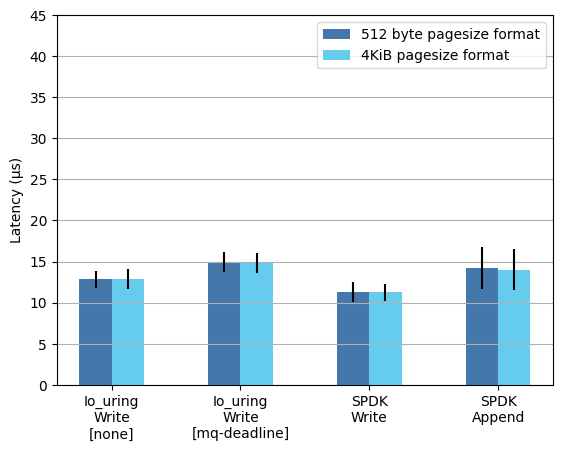

In [169]:
# Marker 3
fig, ax = plt.subplots()

kiops_512 = []
kiopse_512 = []
for path in [
           BenchPath(
            string_to_io_engine("io_uring"), "zns-a", 
            "lbaf0", "write", 1, 1, 8192
            ),
            BenchPath(
            string_to_io_engine("io_uring"), "zns-a", 
            "lbaf0", "writemq", 1, 1, 8192
            ),
            BenchPath(
            string_to_io_engine("spdk"), "zns-a", 
            "lbaf0", "write", 1, 1, 8192
            ),
            BenchPath(
            string_to_io_engine("spdk"), "zns-a", 
            "lbaf0", "append", 1, 1, 8192
            )
]:
    dat = parse_fio_file(path)
    kiops_512.append(dat.lat_mean / 1000)
    kiopse_512.append(dat.lat_stdef / 1000)
ax.bar([x-0.125 for x in range(4)], kiops_512, yerr=kiopse_512, align='center', color="#4477AA", width=0.25, label="512 byte pagesize format")

kiops_4k = []
kiopse_4k = []
for path in [
           BenchPath(
            string_to_io_engine("io_uring"), "zns-a", 
            "lbaf2", "write", 1, 1, 8192
            ),
            BenchPath(
            string_to_io_engine("io_uring"), "zns-a", 
            "lbaf2", "writemq", 1, 1, 8192
            ),
            BenchPath(
            string_to_io_engine("spdk"), "zns-a", 
            "lbaf2", "write", 1, 1, 8192
            ),
            BenchPath(
            string_to_io_engine("spdk"), "zns-a", 
            "lbaf2", "append", 1, 1, 8192
            )
]:
    dat = parse_fio_file(path)
    kiops_4k.append(dat.lat_mean / 1000)
    kiopse_4k.append(dat.lat_stdef / 1000)
ax.bar([x+0.125 for x in range(4)], kiops_4k, yerr=kiopse_4k, align='center', color="#66CCEE", width=0.25, label="4KiB pagesize format")



#plt.xlabel("Througput (KIOPS)")
plt.ylabel("Latency (μs)")
#plt.title("Write througput (QD=1)")
ax.yaxis.grid() # horizontal lines
plt.ylim(0, 45)
plt.legend()
ax.set_xticks(range(4), labels=["Io_uring\nWrite\n[none]", "Io_uring\nWrite\n[mq-deadline]", "SPDK\nWrite", "SPDK\nAppend"])

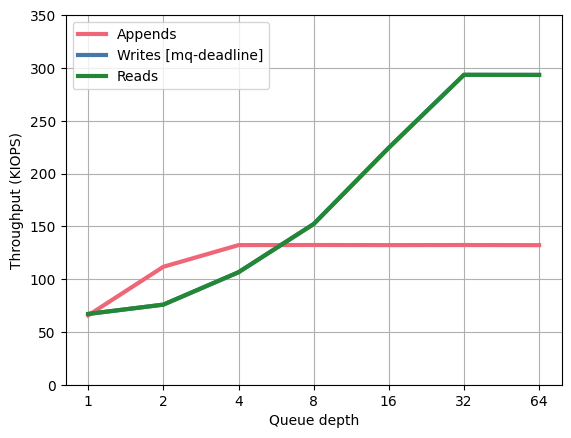

In [127]:
fig, ax = plt.subplots()
plt.xlabel("Queue depth")
plt.ylabel("Throughput (KIOPS)")
ax.grid(True)

qdss = [1,2,4,8,16, 32, 64]
rang = range(len(qdss))    
    
kiops = []
for qd in qdss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("spdk"), "zns-a", 
            "lbaf2", "append", 1, qd, 4096
            )
        )
    kiops.append(dat.iops_mean / 1000)

plt.plot(
    rang,
    kiops,
    linewidth=3,
    label="Appends",
    color="#EE6677",
)

kiops = []
for qd in qdss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("io_uring"), "zns-a", 
            "lbaf2", "writemq", 1, qd, 4096
            )
        )
    kiops.append(dat.iops_mean / 1000)

plt.plot(
    rang,
    kiops,
    linewidth=3,
    label="Writes [mq-deadline]",
    color="#4477AA",
)

kiops = []
for qd in qdss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("io_uring"), "zns-a", 
            "lbaf2", "writemq", 1, qd, 4096
            )
        )
    kiops.append(dat.iops_mean / 1000)

plt.plot(
    rang,
    kiops,
    linewidth=3,
    label="Reads",
    color="#228833",
)

                
plt.ylim(0, 350)
ax.set_xticks(rang, labels=[str(qd) for qd in qdss])

plt.legend()

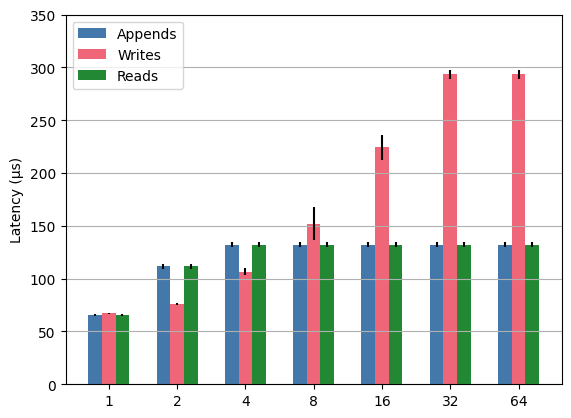

In [126]:
# Marker 3
fig, ax = plt.subplots()

qdss = [1,2,4,8,16, 32, 64]
rang = range(len(qdss))

kiops_append = []
kiopse_append = []
for qd in qdss:
    path = BenchPath(
            string_to_io_engine("spdk"), "zns-a", 
            "lbaf2", "append", 1, qd, 4096
            )
    dat = parse_fio_file(path)
    kiops_append.append(dat.iops_mean / 1000)
    kiopse_append.append(dat.iops_stddev / 1000)
ax.bar([x-0.3 for x in rang], kiops_append, yerr=kiopse_append, align='edge', color="#4477AA", width=0.2, label="Appends")

kiops_write = []
kiopse_write = []
for qd in qdss:
    path = BenchPath(
            string_to_io_engine("io_uring"), "zns-a", 
            "lbaf2", "writemq", 1, qd, 4096
            )
    dat = parse_fio_file(path)
    kiops_write.append(dat.iops_mean / 1000)
    kiopse_write.append(dat.iops_stddev / 1000)
ax.bar([x-0.1 for x in rang], kiops_write, yerr=kiopse_write, align='edge', color="#EE6677", width=0.2, label="Writes")

kiops_read = []
kiopse_read = []
for qd in qdss:
    path = BenchPath(
            string_to_io_engine("spdk"), "zns-a", 
            "lbaf2", "append", 1, qd, 4096
            )
    dat = parse_fio_file(path)
    kiops_read.append(dat.iops_mean / 1000)
    kiopse_read.append(dat.iops_stddev / 1000)
ax.bar([x+0.1 for x in rang], kiops_read, yerr=kiopse_read, align='edge', color="#228833", width=0.2, label="Reads")


#plt.xlabel("Througput (KIOPS)")
plt.ylabel("Latency (μs)")
#plt.title("Write througput (QD=1)")
ax.yaxis.grid() # horizontal lines
plt.ylim(0, 350)
plt.legend()
ax.set_xticks(rang, labels=[str(qd) for qd in qdss])


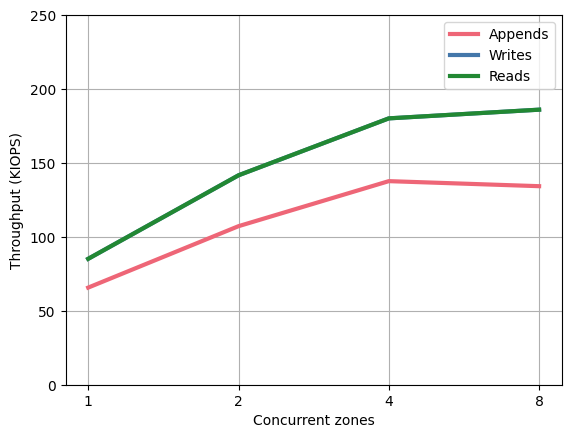

In [137]:
fig, ax = plt.subplots()
plt.xlabel("Concurrent zones")
plt.ylabel("Throughput (KIOPS)")
ax.grid(True)

qdss = [1,2,4,8]
rang = range(len(qdss))    
    
kiops = []
for qd in qdss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("spdk"), "zns-a", 
            "lbaf2", "append", qd, 1, 4096
            )
        )
    kiops.append(dat.iops_mean / 1000)

plt.plot(
    rang,
    kiops,
    linewidth=3,
    label="Appends",
    color="#EE6677",
)

kiops = []
for qd in qdss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("spdk"), "zns-a", 
            "lbaf2", "write", qd, 1, 4096
            )
        )
    kiops.append(dat.iops_mean / 1000)

plt.plot(
    rang,
    kiops,
    linewidth=3,
    label="Writes",
    color="#4477AA",
)


kiops = []
for qd in qdss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("spdk"), "zns-a", 
            "lbaf2", "write", qd, 1, 4096
            )
        )
    kiops.append(dat.iops_mean / 1000)

plt.plot(
    rang,
    kiops,
    linewidth=3,
    label="Reads",
    color="#228833",
)

                
plt.ylim(0, 250)
ax.set_xticks(rang, labels=[str(qd) for qd in qdss])

plt.legend()

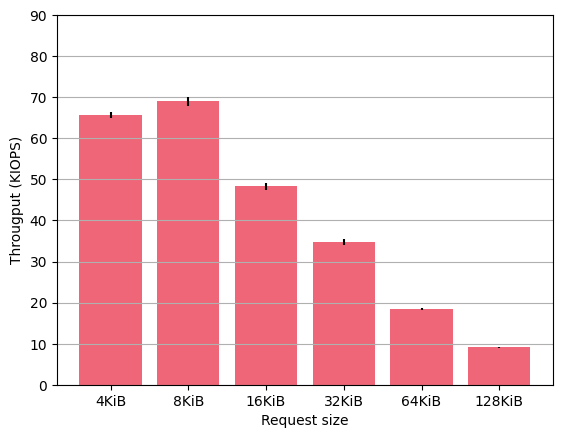

In [150]:
qd = 1
bss = [4096, 8192, 16384, 32768, 65536, 131072]

kiops = []
kiopse = []
for bs in bss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("spdk"), "zns-a", 
            "lbaf2", "append", 1, qd, bs
            )
        )
    kiops.append(dat.iops_mean / 1000)
    kiopse.append(dat.iops_stddev / 1000)

    
fig, ax = plt.subplots()
plt.ylabel("Througput (KIOPS)")
plt.xlabel("Request size")
#plt.title("Append througput (QD=4)")
ax.yaxis.grid() # horizontal lines
plt.ylim(0, 90)

ax.bar(range(len(bss)), kiops, yerr=kiopse, align='center', color="#EE6677")
ax.set_xticks(range(len(bss)), labels=["4KiB", "8KiB", "16KiB", "32KiB", "64KiB", "128KiB"])

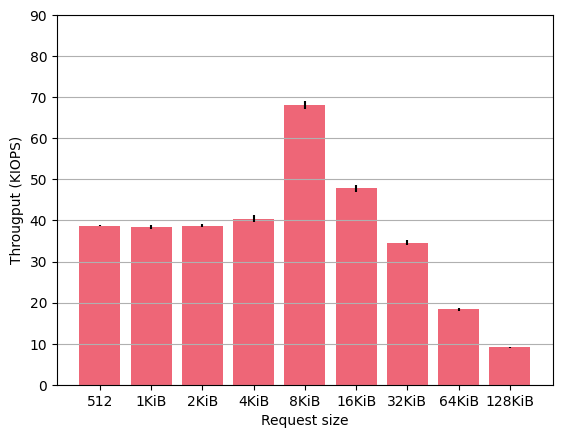

In [161]:
qd = 1
bss = [512,1024,2048,4096, 8192, 16384, 32768, 65536, 131072]

kiops = []
kiopse = []
for bs in bss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("spdk"), "zns-a", 
            "lbaf0", "append", 1, qd, bs
            )
        )
    kiops.append(dat.iops_mean / 1000)
    kiopse.append(dat.iops_stddev / 1000)

    
fig, ax = plt.subplots()
plt.ylabel("Througput (KIOPS)")
plt.xlabel("Request size")
#plt.title("Append througput (QD=4)")
ax.yaxis.grid() # horizontal lines
plt.ylim(0, 90)

ax.bar(range(len(bss)), kiops, yerr=kiopse, align='center', color="#EE6677")
ax.set_xticks(range(len(bss)), labels=["512", "1KiB", "2KiB", "4KiB", "8KiB", "16KiB", "32KiB", "64KiB", "128KiB"])

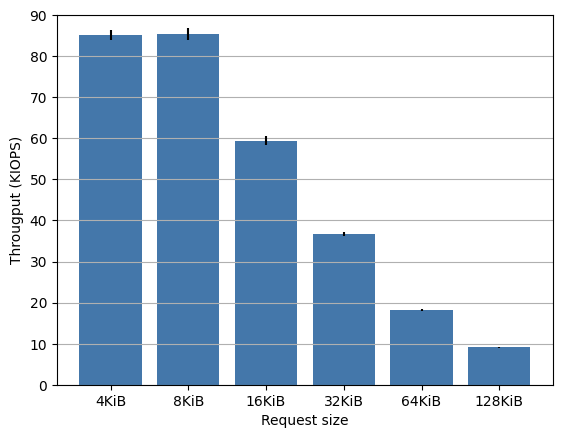

In [149]:
qd = 1
bss = [4096, 8192, 16384, 32768, 65536, 131072]

kiops = []
kiopse = []
for bs in bss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("spdk"), "zns-a", 
            "lbaf2", "write", 1, qd, bs
            )
        )
    kiops.append(dat.iops_mean / 1000)
    kiopse.append(dat.iops_stddev / 1000)

    
fig, ax = plt.subplots()
plt.ylabel("Througput (KIOPS)")
plt.xlabel("Request size")
ax.yaxis.grid() # horizontal lines
plt.ylim(0, 90)

ax.bar(range(len(bss)), kiops, yerr=kiopse, align='center', color="#4477AA")
ax.set_xticks(range(len(bss)), labels=["4KiB", "8KiB", "16KiB", "32KiB", "64KiB", "128KiB"])

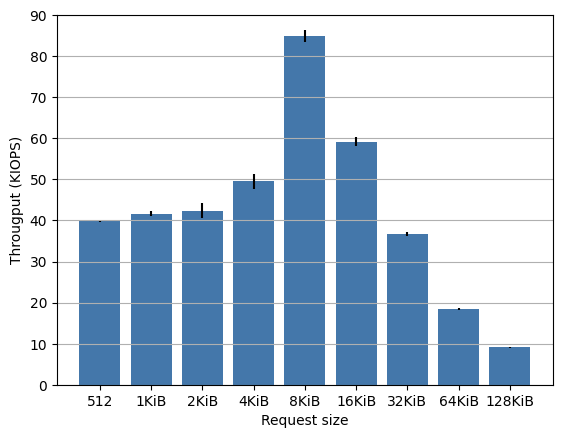

In [159]:
qd = 1
bss = [512,1024,2048,4096, 8192, 16384, 32768, 65536, 131072]

kiops = []
kiopse = []
for bs in bss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("spdk"), "zns-a", 
            "lbaf0", "write", 1, qd, bs
            )
        )
    kiops.append(dat.iops_mean / 1000)
    kiopse.append(dat.iops_stddev / 1000)

    
fig, ax = plt.subplots()
plt.ylabel("Througput (KIOPS)")
plt.xlabel("Request size")
ax.yaxis.grid() # horizontal lines
plt.ylim(0, 90)

ax.bar(range(len(bss)), kiops, yerr=kiopse, align='center', color="#4477AA")
ax.set_xticks(range(len(bss)), labels=["512", "1KiB", "2KiB", "4KiB", "8KiB", "16KiB", "32KiB", "64KiB", "128KiB"])

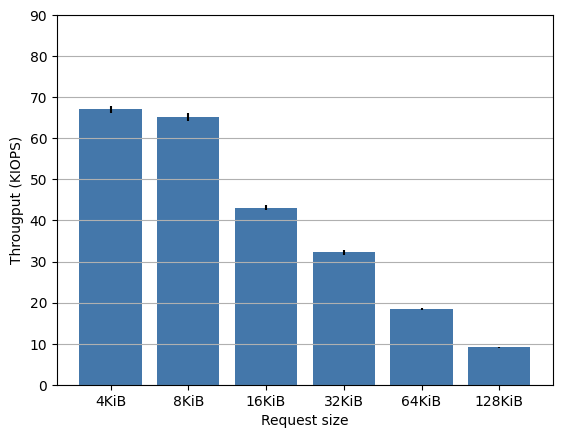

In [151]:
qd = 1
bss = [4096, 8192, 16384, 32768, 65536, 131072]

kiops = []
kiopse = []
for bs in bss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("io_uring"), "zns-a", 
            "lbaf2", "writemq", 1, qd, bs
            )
        )
    kiops.append(dat.iops_mean / 1000)
    kiopse.append(dat.iops_stddev / 1000)

    
fig, ax = plt.subplots()
plt.ylabel("Througput (KIOPS)")
plt.xlabel("Request size")
ax.yaxis.grid() # horizontal lines
plt.ylim(0, 90)

ax.bar(range(len(bss)), kiops, yerr=kiopse, align='center', color="#4477AA")
ax.set_xticks(range(len(bss)), labels=["4KiB", "8KiB", "16KiB", "32KiB", "64KiB", "128KiB"])

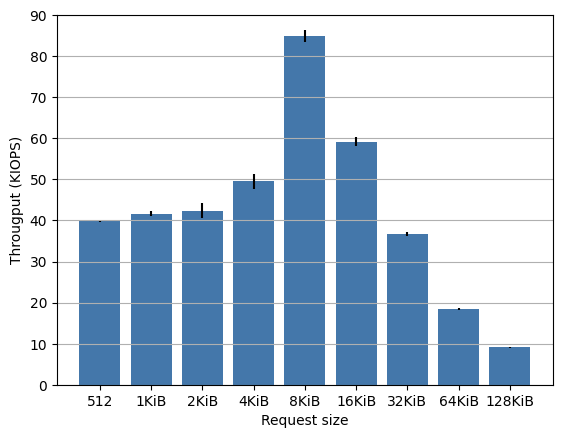

In [13]:
qd = 1
bss = [512,1024,2048,4096, 8192, 16384, 32768, 65536, 131072]

kiops = []
kiopse = []
for bs in bss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("spdk"), "zns-a", 
            "lbaf0", "write", 1, qd, bs
            )
        )
    kiops.append(dat.iops_mean / 1000)
    kiopse.append(dat.iops_stddev / 1000)

    
fig, ax = plt.subplots()
plt.ylabel("Througput (KIOPS)")
plt.xlabel("Request size")
ax.yaxis.grid() # horizontal lines
plt.ylim(0, 90)

ax.bar(range(len(bss)), kiops, yerr=kiopse, align='center', color="#4477AA")
ax.set_xticks(range(len(bss)), labels=["512", "1KiB", "2KiB", "4KiB", "8KiB", "16KiB", "32KiB", "64KiB", "128KiB"])

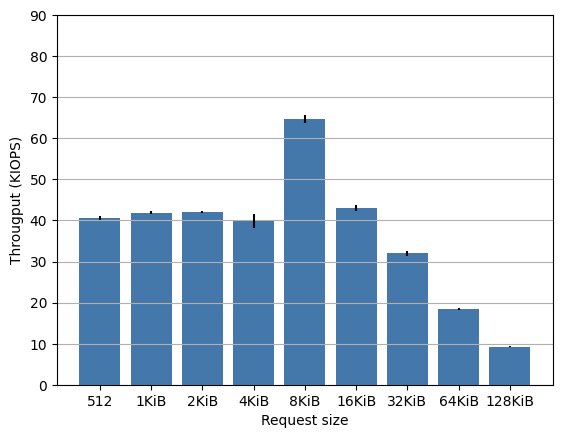

In [158]:
qd = 1
bss = [512,1024,2048,4096, 8192, 16384, 32768, 65536, 131072]

kiops = []
kiopse = []
for bs in bss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("io_uring"), "zns-a", 
            "lbaf0", "writemq", 1, qd, bs
            )
        )
    kiops.append(dat.iops_mean / 1000)
    kiopse.append(dat.iops_stddev / 1000)

    
fig, ax = plt.subplots()
plt.ylabel("Througput (KIOPS)")
plt.xlabel("Request size")
ax.yaxis.grid() # horizontal lines
plt.ylim(0, 90)

ax.bar(range(len(bss)), kiops, yerr=kiopse, align='center', color="#4477AA")
ax.set_xticks(range(len(bss)), labels=["512", "1KiB", "2KiB", "4KiB", "8KiB", "16KiB", "32KiB", "64KiB", "128KiB"])

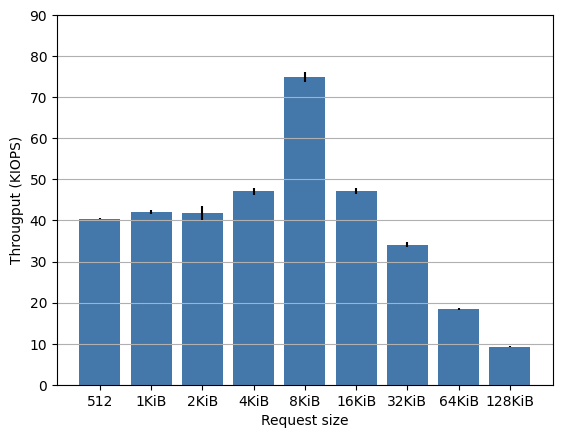

In [11]:
qd = 1
bss = [512,1024,2048,4096, 8192, 16384, 32768, 65536, 131072]

kiops = []
kiopse = []
for bs in bss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("io_uring"), "zns-a", 
            "lbaf0", "write", 1, qd, bs
            )
        )
    kiops.append(dat.iops_mean / 1000)
    kiopse.append(dat.iops_stddev / 1000)

    
fig, ax = plt.subplots()
plt.ylabel("Througput (KIOPS)")
plt.xlabel("Request size")
ax.yaxis.grid() # horizontal lines
plt.ylim(0, 90)

ax.bar(range(len(bss)), kiops, yerr=kiopse, align='center', color="#4477AA")
ax.set_xticks(range(len(bss)), labels=["512", "1KiB", "2KiB", "4KiB", "8KiB", "16KiB", "32KiB", "64KiB", "128KiB"])

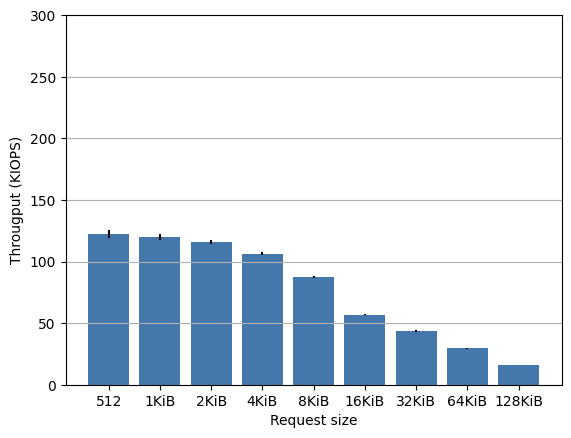

In [9]:
qd = 1
bss = [512,1024,2048,4096, 8192, 16384, 32768, 65536, 131072]

kiops = []
kiopse = []
for bs in bss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("io_uring"), "zns-a", 
            "lbaf0", "read", 1, qd, bs
            )
        )
    kiops.append(dat.iops_mean_read / 1000)
    kiopse.append(dat.iops_stddev_read / 1000)

    
fig, ax = plt.subplots()
plt.ylabel("Througput (KIOPS)")
plt.xlabel("Request size")
ax.yaxis.grid() # horizontal lines
plt.ylim(0, 300)

ax.bar(range(len(bss)), kiops, yerr=kiopse, align='center', color="#4477AA")
ax.set_xticks(range(len(bss)), labels=["512", "1KiB", "2KiB", "4KiB", "8KiB", "16KiB", "32KiB", "64KiB", "128KiB"])

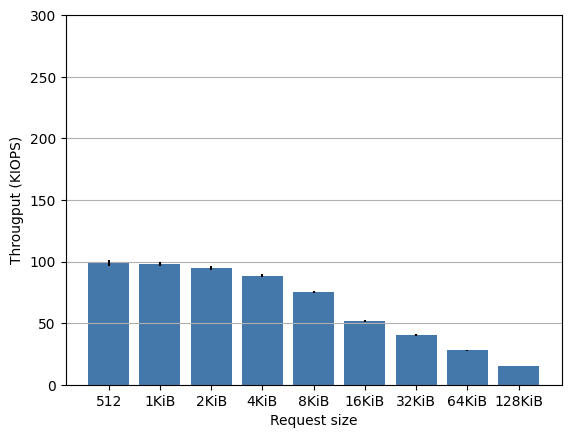

In [7]:
qd = 1
bss = [512,1024,2048,4096, 8192, 16384, 32768, 65536, 131072]

kiops = []
kiopse = []
for bs in bss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("io_uring"), "zns-a", 
            "lbaf0", "readmq", 1, qd, bs
            )
        )
    kiops.append(dat.iops_mean_read / 1000)
    kiopse.append(dat.iops_stddev_read / 1000)

    
fig, ax = plt.subplots()
plt.ylabel("Througput (KIOPS)")
plt.xlabel("Request size")
ax.yaxis.grid() # horizontal lines
plt.ylim(0, 300)

ax.bar(range(len(bss)), kiops, yerr=kiopse, align='center', color="#4477AA")
ax.set_xticks(range(len(bss)), labels=["512", "1KiB", "2KiB", "4KiB", "8KiB", "16KiB", "32KiB", "64KiB", "128KiB"])

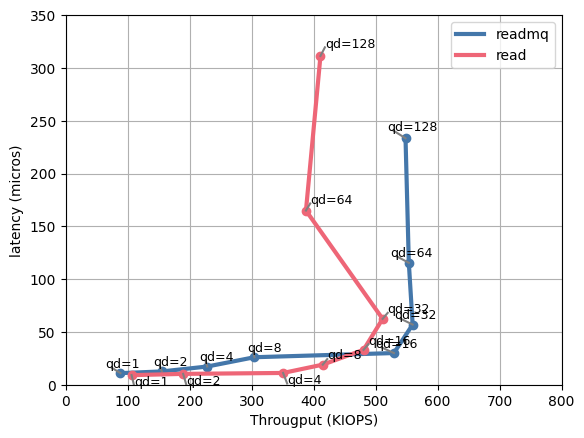

In [5]:
# Setup plot
fig, ax = plt.subplots()
plt.xlabel("Througput (KIOPS)")
plt.ylabel("latency (micros)")
#plt.title("Append versus write performance (request size=4KiB)")
ax.grid(True)

# Get data for writemq
qdss = [1,2,4,8,16,32,64,128]
kiops = []
lats = []
for qd in qdss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("io_uring"), "zns-a", 
            "lbaf0", "readmq", 1, qd, 4096
            )
        )
    kiops.append(dat.iops_mean_read / 1000)
    lats.append(dat.lat_mean_read / 1000)
    
# Writemq line plot
plt.plot(
    kiops,
    lats,
    linewidth=3,
    label="readmq",
    color="#4477AA",
)

# Writemq QD labels
for i in range(len(kiops)):
            plt.plot(kiops[i], lats[i], "o", color="#4477AA")
            if qdss[i] == 1:
                plt.text((kiops[i] - 25) * (1.01), (lats[i] + 5) *
                         (1.01), s='qd='+str(qdss[i]), fontsize=9)
                plt.plot([(kiops[i] - 15) * (1.01), kiops[i]],[(lats[i]+5) *
                     (1.01),lats[i]], color='grey')
            elif qdss[i] > 8:
                plt.text((kiops[i] - 35) * (1.01), (lats[i] + 5) *
                         (1.01), s='qd='+str(qdss[i]), fontsize=9)                
                plt.plot([(kiops[i] - 25) * (1.01), kiops[i]],[(lats[i]+5) *
                     (1.01),lats[i]], color='grey')
            else:
                plt.text((kiops[i] - 15) * (1.01), (lats[i] + 5) *
                         (1.01), s='qd='+str(qdss[i]), fontsize=9)
                plt.plot([(kiops[i] - 5) * (1.01), kiops[i]],[(lats[i]+5) *
                     (1.01),lats[i]], color='grey')
   

 # Get data for Append
qdss = [1,2,4,8,16,32,64,128]
kiops = []
lats = []
for qd in qdss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("io_uring"), "zns-a", 
            "lbaf0", "read", 1, qd, 4096
            )
        )
    kiops.append(dat.iops_mean_read / 1000)
    lats.append(dat.lat_mean_read / 1000)

# Append line plot
plt.plot(
    kiops,
    lats,
    linewidth=3,
    label="read",
    color="#EE6677",
)

# Append QD labels
for i in range(len(kiops)):
            plt.plot(kiops[i], lats[i], "o", color="#EE6677")
            if qdss[i] >= 8:
                plt.text((kiops[i] + 3) * (1.01), (lats[i]+5) *
                     (1.01), s='qd='+str(qdss[i]), fontsize=9)                
                plt.plot([(kiops[i] + 3) * (1.01), kiops[i]],[(lats[i]+5) *
                     (1.01),lats[i]], color='grey')
            else:
                plt.text((kiops[i] + 3) * (1.01), (lats[i]-10) *
                     (1.01), s='qd='+str(qdss[i]), fontsize=9)
                plt.plot([(kiops[i] + 3) * (1.01), kiops[i]],[(lats[i]-10) *
                     (1.01),lats[i]], color='grey')

# Plot it
plt.xlim(0, 800)
plt.ylim(0, 350)
plt.legend()
#fig.savefig("/mnt/data/projects/vu/paper-zns-measurements/supplements//write_versus_appends_4KiB.pdf")

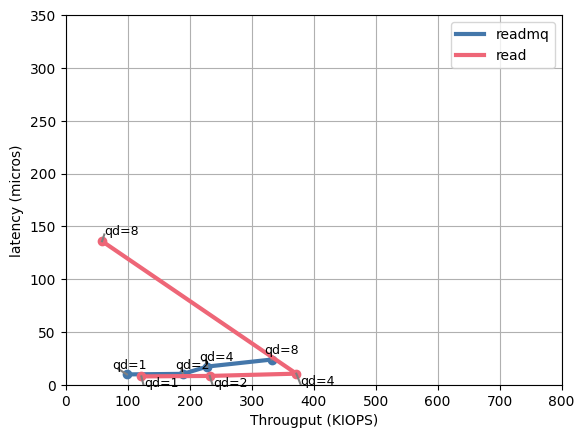

In [3]:
# Setup plot
fig, ax = plt.subplots()
plt.xlabel("Througput (KIOPS)")
plt.ylabel("latency (micros)")
#plt.title("Append versus write performance (request size=4KiB)")
ax.grid(True)

# Get data for writemq
qdss = [1,2,4,8]
kiops = []
lats = []
for qd in qdss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("io_uring"), "zns-a", 
            "lbaf0", "readmq", 1, qd, 512
            )
        )
    kiops.append(dat.iops_mean_read / 1000)
    lats.append(dat.lat_mean_read / 1000)
    
# Writemq line plot
plt.plot(
    kiops,
    lats,
    linewidth=3,
    label="readmq",
    color="#4477AA",
)

# Writemq QD labels
for i in range(len(kiops)):
            plt.plot(kiops[i], lats[i], "o", color="#4477AA")
            if qdss[i] == 1:
                plt.text((kiops[i] - 25) * (1.01), (lats[i] + 5) *
                         (1.01), s='qd='+str(qdss[i]), fontsize=9)
                plt.plot([(kiops[i] - 15) * (1.01), kiops[i]],[(lats[i]+5) *
                     (1.01),lats[i]], color='grey')
            elif qdss[i] > 8:
                plt.text((kiops[i] - 35) * (1.01), (lats[i] + 5) *
                         (1.01), s='qd='+str(qdss[i]), fontsize=9)                
                plt.plot([(kiops[i] - 25) * (1.01), kiops[i]],[(lats[i]+5) *
                     (1.01),lats[i]], color='grey')
            else:
                plt.text((kiops[i] - 15) * (1.01), (lats[i] + 5) *
                         (1.01), s='qd='+str(qdss[i]), fontsize=9)
                plt.plot([(kiops[i] - 5) * (1.01), kiops[i]],[(lats[i]+5) *
                     (1.01),lats[i]], color='grey')
   

 # Get data for Append
qdss = [1,2,4,8]
kiops = []
lats = []
for qd in qdss:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("io_uring"), "zns-a", 
            "lbaf0", "read", 1, qd, 512
            )
        )
    kiops.append(dat.iops_mean_read / 1000)
    lats.append(dat.lat_mean_read / 1000)

# Append line plot
plt.plot(
    kiops,
    lats,
    linewidth=3,
    label="read",
    color="#EE6677",
)

# Append QD labels
for i in range(len(kiops)):
            plt.plot(kiops[i], lats[i], "o", color="#EE6677")
            if qdss[i] >= 8:
                plt.text((kiops[i] + 3) * (1.01), (lats[i]+5) *
                     (1.01), s='qd='+str(qdss[i]), fontsize=9)                
                plt.plot([(kiops[i] + 3) * (1.01), kiops[i]],[(lats[i]+5) *
                     (1.01),lats[i]], color='grey')
            else:
                plt.text((kiops[i] + 3) * (1.01), (lats[i]-10) *
                     (1.01), s='qd='+str(qdss[i]), fontsize=9)
                plt.plot([(kiops[i] + 3) * (1.01), kiops[i]],[(lats[i]-10) *
                     (1.01),lats[i]], color='grey')

# Plot it
plt.xlim(0, 800)
plt.ylim(0, 350)
plt.legend()
#fig.savefig("/mnt/data/projects/vu/paper-zns-measurements/supplements//write_versus_appends_4KiB.pdf")

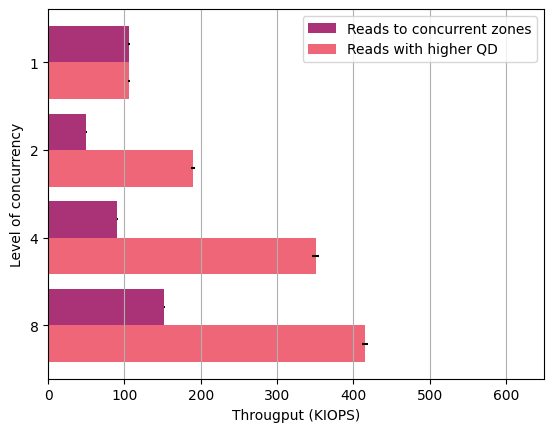

In [23]:
qd = 4
conc = [1,2,4,8]
# https://personal.sron.nl/~pault/

fig, ax = plt.subplots()
plt.xlabel("Througput (KIOPS)")
plt.ylabel("Level of concurrency")
#plt.title("Append througput")
ax.xaxis.grid() # horizontal lines
plt.xlim(0, 650)

kiops = []
kiopse = []
for c in conc:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("io_uring"), "zns-a", 
            "lbaf0", "read", c, 1, 4096
            )
        )
    kiops.append(dat.iops_mean_read / 1000)
    kiopse.append(dat.iops_stddev_read / 1000)

ax.barh([(x*0.6) - 0.125 for x in range(len(conc))], kiops, xerr=kiopse, align='center', color="#AA3377", 
        height=0.25, label='Reads to concurrent zones')

kiops = []
kiopse = []
for c in conc:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("io_uring"), "zns-a", 
            "lbaf0", "read", 1, c, 4096
            )
        )
    kiops.append(dat.iops_mean_read / 1000)
    kiopse.append(dat.iops_stddev_read / 1000)
    
    
ax.barh([(x*0.6) + 0.125 for x in range(len(conc))], kiops, xerr=kiopse, align='center', color="#EE6677", 
        height=0.25, label='Reads with higher QD')
    
ax.set_yticks([x*0.6 for x in range(len(conc))], labels=["1", "2", "4", "8"])
ax.invert_yaxis()  # labels read top-to-bottom

plt.legend()
#fig.savefig("/mnt/data/projects/vu/paper-zns-measurements/supplements/concurrent_writes_throughput.pdf")

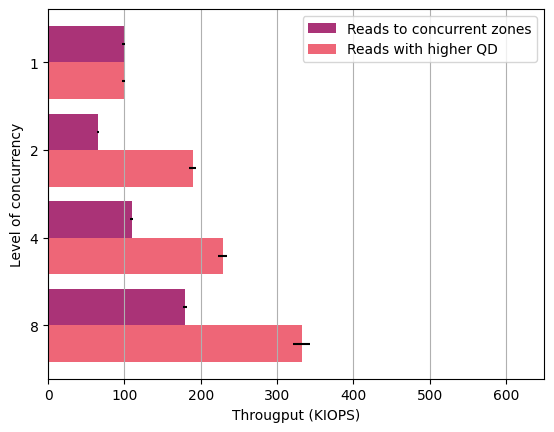

In [21]:
qd = 4
conc = [1,2,4,8]
# https://personal.sron.nl/~pault/

fig, ax = plt.subplots()
plt.xlabel("Througput (KIOPS)")
plt.ylabel("Level of concurrency")
#plt.title("Append througput")
ax.xaxis.grid() # horizontal lines
plt.xlim(0, 650)

kiops = []
kiopse = []
for c in conc:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("io_uring"), "zns-a", 
            "lbaf0", "readmq", c, 1, 4096
            )
        )
    kiops.append(dat.iops_mean_read / 1000)
    kiopse.append(dat.iops_stddev_read / 1000)

ax.barh([(x*0.6) - 0.125 for x in range(len(conc))], kiops, xerr=kiopse, align='center', color="#AA3377", 
        height=0.25, label='Reads to concurrent zones')

kiops = []
kiopse = []
for c in conc:
    dat = parse_fio_file(
        BenchPath(
            string_to_io_engine("io_uring"), "zns-a", 
            "lbaf0", "readmq", 1, c, 4096
            )
        )
    kiops.append(dat.iops_mean_read / 1000)
    kiopse.append(dat.iops_stddev_read / 1000)
    
    
ax.barh([(x*0.6) + 0.125 for x in range(len(conc))], kiops, xerr=kiopse, align='center', color="#EE6677", 
        height=0.25, label='Reads with higher QD')
    
ax.set_yticks([x*0.6 for x in range(len(conc))], labels=["1", "2", "4", "8"])
ax.invert_yaxis()  # labels read top-to-bottom

plt.legend()
#fig.savefig("/mnt/data/projects/vu/paper-zns-measurements/supplements/concurrent_writes_throughput.pdf")